<a href="https://colab.research.google.com/github/cornelius152/Text-Classification---Data-Science-Internship/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Packages**

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import global libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import language libraries and packages
import nltk
nltk.download('punkt') # A pre-trained unsupervised machine learning model to tokenize text into individual words or sentences
nltk.download('averaged_perceptron_tagger') # For pos-tagger
nltk.download('omw-1.4') # Open Multilingual WordNet (OMW)

from nltk.corpus import stopwords
nltk.download('stopwords') # For 'English' stopwords

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') # For lemmatization 

pd.options.mode.chained_assignment = None  # default='warn' and I am disabling it

import warnings
warnings.filterwarnings('ignore', message='.*', category=UserWarning, module='sklearn') # To suppress precision score warning

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Data**

In [4]:
# Import files

# Unclassified (uc) data
uc_data = pd.read_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/unique_unclassified_questions.csv')
uc_data = uc_data.rename(columns={'question': 'Question'})

# Classified (c) data
c_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/categorized_questions.xlsx')

# CDC dataset
cdc_data = pd.read_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Historical_Questions.csv')

# All classified data (c_data + cdc_data)
class_data = pd.concat([c_data, cdc_data])

# All data
all_data = pd.concat([c_data, uc_data, cdc_data])

# **Processing Data**

In [5]:
# Processor function to do everything in one go

# Create stopword variable holding all stopwords in English (nltk.download('stopwords'))
stopwords = stopwords.words('english')

# Create porter and lancaster stemmer objects
porter = PorterStemmer()
lancaster = LancasterStemmer()

# Create lemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

def processor(data, feature, tokens='tokens'):
    
    # Drop duplicate rows based on a specified feature, but keep first instance of duplicate and reset index
    data = data.drop_duplicates(subset=feature, keep='first', ignore_index=True)

    # Tokenize feature of textual data, and create new column with tokenized text (unigrams) (nltk.download('punkt'))
    data[tokens] = data[feature].apply(nltk.word_tokenize)
    
    # Lowercasing and removing stop words, and making sure all textual data is alphanumeric
    data[tokens] = data[tokens].apply(lambda x: 
                                      [word.lower() for word in x if word not in (stopwords) and word.isalnum()])
    
    # Processing tokens into string and creating a separate column of this for later use
    data['str tokens'] = data[tokens].apply(lambda x: ' '.join(x))
        
    # Applying bigrams
    data['bigrams'] = data[tokens].apply(lambda x: list(nltk.bigrams(x)))

    # Applying porter stem
    data['porter stem'] = data[tokens].apply(lambda x: [porter.stem(word) for word in x])
    
    # Applying lancaster stem
    data['lancaster stem'] = data[tokens].apply(lambda x: [lancaster.stem(word) for word in x])
    
    # Lemmatization (nltk.download('wordnet'))
    data['lemma'] = data[tokens].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
    
    # Pos-tagging (nltk.download('averaged_perceptron_tagger'))
    data['postag'] = data[tokens].apply(lambda x: nltk.pos_tag(x))
    
    return data

### Tokens Processed

In [6]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the TOKENS feature
tokens_uc_data = pd.DataFrame(processor(uc_data, 'Question')['tokens'])
tokens_c_data = pd.DataFrame(processor(c_data, 'Question')['tokens'])
tokens_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['tokens'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
tokens_uc_data = tokens_uc_data.drop(index=1)

# Concatenating all three dataframes into one
tokens_all_data = pd.concat([tokens_uc_data, tokens_c_data, tokens_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
tokens_classified_data = pd.concat([tokens_c_data, tokens_cdc_data])

In [7]:
tokens_c_data.head(3)

,tokens
0,"[age, group]"
1,[gender]
2,"[when, thinking, discomforts, consuming, wheat..."


### Bigrams Processed

In [8]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Bigrams feature
bigram_uc_data = pd.DataFrame(processor(uc_data, 'Question')['bigrams'])
bigram_c_data = pd.DataFrame(processor(c_data, 'Question')['bigrams'])
bigram_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['bigrams'])

# Dropping empty lists in dataframes
bigram_uc_data_2 = bigram_uc_data[bigram_uc_data['bigrams'].map(len) > 0]
bigram_c_data_2 = bigram_c_data[bigram_c_data['bigrams'].map(len) > 0]
bigram_cdc_data_2 = bigram_cdc_data[bigram_cdc_data['bigrams'].map(len) > 0]

# Concatenating all three dataframes into one
bigram_all_data = pd.concat([bigram_uc_data_2, bigram_c_data_2, bigram_cdc_data_2])

# Concatenating classified datasets: classified OH and CDC datasets
bigram_classified_data = pd.concat([bigram_c_data_2, bigram_cdc_data_2])

In [9]:
bigram_c_data.head(3)

,bigrams
0,"[(age, group)]"
1,[]
2,"[(when, thinking), (thinking, discomforts), (d..."


### Lemma Processed


In [10]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Lemma feature
lemma_uc_data = pd.DataFrame(processor(uc_data, 'Question')['lemma'])
lemma_c_data = pd.DataFrame(processor(c_data, 'Question')['lemma'])
lemma_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['lemma'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
lemma_uc_data = lemma_uc_data.drop(index=1)

# Concatenating all three dataframes into one
lemma_all_data = pd.concat([lemma_uc_data, lemma_c_data, lemma_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
lemma_classified_data = pd.concat([lemma_c_data, lemma_cdc_data])

In [11]:
lemma_c_data.head(3)

,lemma
0,"[age, group]"
1,[gender]
2,"[when, thinking, discomfort, consuming, wheat,..."


### Porter Processed

In [12]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Porter Stem feature
porter_uc_data = pd.DataFrame(processor(uc_data, 'Question')['porter stem'])
porter_c_data = pd.DataFrame(processor(c_data, 'Question')['porter stem'])
porter_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['porter stem'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
porter_uc_data = porter_uc_data.drop(index=1)

# Concatenating all three dataframes into one
porter_all_data = pd.concat([porter_uc_data, porter_c_data, porter_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
porter_classified_data = pd.concat([porter_c_data, porter_cdc_data])

In [13]:
porter_c_data.head(3)

,porter stem
0,"[age, group]"
1,[gender]
2,"[when, think, discomfort, consum, wheat, produ..."


### Lancaster Processed

In [14]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Lancaster Stem feature
lancaster_uc_data = pd.DataFrame(processor(uc_data, 'Question')['lancaster stem'])
lancaster_c_data = pd.DataFrame(processor(c_data, 'Question')['lancaster stem'])
lancaster_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['lancaster stem'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
lancaster_uc_data = lancaster_uc_data.drop(index=1)

# Concatenating all three dataframes into one
lancaster_all_data = pd.concat([lancaster_uc_data, lancaster_c_data, lancaster_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
lancaster_classified_data = pd.concat([lancaster_c_data, lancaster_cdc_data])

In [15]:
lancaster_c_data.head(3)

,lancaster stem
0,"[ag, group]"
1,[gend]
2,"[when, think, discomfort, consum, whe, produc,..."


### Postag Processed

In [16]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Postag feature
postag_uc_data = pd.DataFrame(processor(uc_data, 'Question')['postag'])
postag_c_data = pd.DataFrame(processor(c_data, 'Question')['postag'])
postag_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['postag'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
postag_uc_data = postag_uc_data.drop(index=1)

# Concatenating all three dataframes into one
postag_all_data = pd.concat([postag_uc_data, postag_c_data, postag_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
postag_classified_data = pd.concat([postag_c_data, postag_cdc_data])

In [17]:
postag_c_data.head(3)

,postag
0,"[(age, NN), (group, NN)]"
1,"[(gender, NN)]"
2,"[(when, WRB), (thinking, VBG), (discomforts, N..."


# **List Maker**

In [18]:
# Function to create one long list of separate sentences that are all of type string so that I can use them as inputs

# Function takes in two parameters: data as a dataframe; feature as the column of the dataframe
def list_maker(data, feature):
    data = data[feature] # Variable to hold the specific feature of the dataframe
    data_words = [] # Creating two empty lists to hold the words and sentences from the previous dataframe
    data_sents = []

    for lists in data: # Running a for loop through each row of the column of dataframe
        if len(lists) == 0: # Skip empty lists
            continue
        elif isinstance(lists[0], tuple):  # Check if list is a list of tuples - mainly doing this for postags
            words = ['_'.join(word) for word in lists]  # Join bigrams with a space
        else:
            words = lists  # Else, just use the list as is
        string = ' '.join(words) # Each row contains a list of tokens; so here I am joining words in the list and building one string, separated by a blank space (' ')
        data_words.append(string) # Appending the words to the empty data_words list

    data_sents = [word for word in data_words if word] # Going through each sentence in data_words, making sure it is a word, and appending that to the empty data_sents list
    
    return data_sents

## Tokens as List

In [19]:
# Classified data
tokens_c_list = list_maker(tokens_c_data, 'tokens')

# Unclassified data
tokens_uc_list = list_maker(tokens_uc_data, 'tokens')

# CDC data
tokens_cdc_list = list_maker(tokens_cdc_data, 'tokens')

# All data
tokens_all_list = list_maker(tokens_all_data, 'tokens')

# All classified data
tokens_class_list = list_maker(tokens_classified_data, 'tokens')

## Bigram as List

In [20]:
# Classified data
bigram_c_list = list_maker(bigram_c_data, 'bigrams')

# Unclassified data
bigram_uc_list = list_maker(bigram_uc_data, 'bigrams')

# CDC data
bigram_cdc_list = list_maker(bigram_cdc_data, 'bigrams')

# All data
bigram_all_list = list_maker(bigram_all_data, 'bigrams')

# All classified data
bigram_class_list = list_maker(bigram_classified_data, 'bigrams')

## Lemma as List

In [21]:
# Classified data
lemma_c_list = list_maker(lemma_c_data, 'lemma')

# Unclassified data
lemma_uc_list = list_maker(lemma_uc_data, 'lemma')

# CDC data
lemma_cdc_list = list_maker(lemma_cdc_data, 'lemma')

# All data
lemma_all_list = list_maker(lemma_all_data, 'lemma')

# All classified data
lemma_class_list = list_maker(lemma_classified_data, 'lemma')

## Porter as List

In [22]:
# Classified data
porter_c_list = list_maker(porter_c_data, 'porter stem')

# Unclassified data
porter_uc_list = list_maker(porter_uc_data, 'porter stem')

# CDC data
porter_cdc_list = list_maker(porter_cdc_data, 'porter stem')

# All data
porter_all_list = list_maker(porter_all_data, 'porter stem')

# All classified data
porter_class_list = list_maker(porter_classified_data, 'porter stem')

## Lancaster as List

In [23]:
# Classified data
lancaster_c_list = list_maker(lancaster_c_data, 'lancaster stem')

# Unclassified data
lancaster_uc_list = list_maker(lancaster_uc_data, 'lancaster stem')

# CDC data
lancaster_cdc_list = list_maker(lancaster_cdc_data, 'lancaster stem')

# All data
lancaster_all_list = list_maker(lancaster_all_data, 'lancaster stem')

# All classified data
lancaster_class_list = list_maker(lancaster_classified_data, 'lancaster stem')

## Postag as List

In [24]:
# Classified data
postag_c_list = list_maker(postag_c_data, 'postag')

# Unclassified data
postag_uc_list = list_maker(postag_uc_data, 'postag')

# CDC data
postag_cdc_list = list_maker(postag_cdc_data, 'postag')

# All data
postag_all_list = list_maker(postag_all_data, 'postag')

# All classified data
postag_class_list = list_maker(postag_classified_data, 'postag')

# **TF-IDF Vector Emebddings**

In [25]:
# Equivalent to CountVectorizer followed by TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [26]:
# Define your tfidf_builder function to create tfidf vectors for each question and then store them in a list
def tfidf_builder(data_list):
    # Instantiate tfidfvectorizer object
    tfidf_vectorizer = TFIDF()

    # Fit transform data to tfidf vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(data_list)

    # Grab feature names
    data_feature_names = tfidf_vectorizer.get_feature_names_out()

    # Instantiate empty list to hold all values for each question from tfidf vectorization
    tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns = data_feature_names)

    return tfidf_df

# output: 
# Assume general form: (A,B) C
# A: Document index 
# B: Specific word-vector index 
# C: TFIDF score for word B in document A
# Produces a sparse matrix

## Tokens TF-IDF Vectors

In [27]:
# Classified data
tokens_c_vectors = tfidf_builder(tokens_c_list)

# Unclassified data
tokens_uc_vectors = tfidf_builder(tokens_uc_list)

# CDC data
tokens_cdc_vectors = tfidf_builder(tokens_cdc_list)

# All data
tokens_all_vectors = tfidf_builder(tokens_all_list)

# All classified data
tokens_class_vectors = tfidf_builder(tokens_class_list)

## Bigram TF-IDF Vectors

In [28]:
# Classified data
bigram_c_vectors = tfidf_builder(bigram_c_list)

# Unclassified data
bigram_uc_vectors = tfidf_builder(bigram_uc_list)

# CDC data
bigram_cdc_vectors = tfidf_builder(bigram_cdc_list)

# All data
bigram_all_vectors = tfidf_builder(bigram_all_list)

# All classified data
bigram_class_vectors = tfidf_builder(bigram_class_list)

## Lemma TF-IDF Vectors

In [29]:
# Classified data
lemma_c_vectors = tfidf_builder(lemma_c_list)

# Unclassified data
lemma_uc_vectors = tfidf_builder(lemma_uc_list)

# CDC data
lemma_cdc_vectors = tfidf_builder(lemma_cdc_list)

# All data
lemma_all_vectors = tfidf_builder(lemma_all_list)

# All classified data
lemma_class_vectors = tfidf_builder(lemma_class_list)

## Porter TF-IDF Vectors

In [30]:
# Classified data
porter_c_vectors = tfidf_builder(porter_c_list)

# Unclassified data
porter_uc_vectors = tfidf_builder(porter_uc_list)

# CDC data
porter_cdc_vectors = tfidf_builder(porter_cdc_list)

# All data
porter_all_vectors = tfidf_builder(porter_all_list)

# All classified data
porter_class_vectors = tfidf_builder(porter_class_list)

## Lancaster TF-IDF Vectors

In [31]:
# Classified data
lancaster_c_vectors = tfidf_builder(lancaster_c_list)

# Unclassified data
lancaster_uc_vectors = tfidf_builder(lancaster_uc_list)

# CDC data
lancaster_cdc_vectors = tfidf_builder(lancaster_cdc_list)

# All data
lancaster_all_vectors = tfidf_builder(lancaster_all_list)

# All classified data
lancaster_class_vectors = tfidf_builder(lancaster_class_list)

## Postag TF-IDF Vectors

In [32]:
# Classified data
postag_c_vectors = tfidf_builder(postag_c_list)

# Unclassified data
postag_uc_vectors = tfidf_builder(postag_uc_list)

# CDC data
postag_cdc_vectors = tfidf_builder(postag_cdc_list)

# All data
postag_all_vectors = tfidf_builder(postag_all_list)

# All classified data
postag_class_vectors = tfidf_builder(postag_class_list)

# **TF-IDF Vector Averages**

In [33]:
# Building function to calculate TF-IDF vector averages

def tfidf_vectors_avgs(tfidf_vectors):
    # Instantiate emtpy list to hold vector averages
    tfidf_vector_avgs_list = []

    # Run for loop through data and calculate average
    for i in range(len(tfidf_vectors)):
        tfidf_vector_avgs_list.append(np.sum(tfidf_vectors.iloc[i])/len(tfidf_vectors.iloc[i].values))
        
    return tfidf_vector_avgs_list

## Tokens TF-IDF Vector Averages

In [34]:
# Classified data
tokens_c_vector_avgs = tfidf_vectors_avgs(tokens_c_vectors)

# Unclassified data
tokens_uc_vector_avgs= tfidf_vectors_avgs(tokens_uc_vectors)

# CDC data
tokens_cdc_vector_avgs = tfidf_vectors_avgs(tokens_cdc_vectors)

# All data
tokens_all_vector_avgs = tfidf_vectors_avgs(tokens_all_vectors)

# All classified data
tokens_class_vector_avgs = tfidf_vectors_avgs(tokens_class_vectors)

## Bigram TF-IDF Vector Averages

In [35]:
# Classified data
bigram_c_vector_avgs = tfidf_vectors_avgs(bigram_c_vectors)

# Unclassified data
bigram_uc_vector_avgs = tfidf_vectors_avgs(bigram_uc_vectors)

# CDC data
bigram_cdc_vector_avgs = tfidf_vectors_avgs(bigram_cdc_vectors)

# All data
bigram_all_vector_avgs = tfidf_vectors_avgs(bigram_all_vectors)

# All classified data
bigram_class_vector_avgs = tfidf_vectors_avgs(bigram_class_vectors)

## Lemma TF-IDF Vector Averages

In [36]:
# Classified data
lemma_c_vector_avgs = tfidf_vectors_avgs(lemma_c_vectors)

# Unclassified data
lemma_uc_vector_avgs = tfidf_vectors_avgs(lemma_uc_vectors)

# CDC data
lemma_cdc_vector_avgs = tfidf_vectors_avgs(lemma_cdc_vectors)

# All data
lemma_all_vector_avgs = tfidf_vectors_avgs(lemma_all_vectors)

# All classified data
lemma_class_vector_avgs = tfidf_vectors_avgs(lemma_class_vectors)

## Porter TF-IDF Vector Averages

In [37]:
# Classified data
porter_c_vector_avgs = tfidf_vectors_avgs(porter_c_vectors)

# Unclassified data
porter_uc_vector_avgs = tfidf_vectors_avgs(porter_uc_vectors)

# CDC data
porter_cdc_vector_avgs = tfidf_vectors_avgs(porter_cdc_vectors)

# All data
porter_all_vector_avgs = tfidf_vectors_avgs(porter_all_vectors)

# All classified data
porter_class_vector_avgs = tfidf_vectors_avgs(porter_class_vectors)

## Lancaster TF-IDF Vector Averages

In [38]:
# Classified data
lancaster_c_vector_avgs = tfidf_vectors_avgs(lancaster_c_vectors)

# Unclassified data
lancaster_uc_vector_avgs = tfidf_vectors_avgs(lancaster_uc_vectors)

# CDC data
lancaster_cdc_vector_avgs = tfidf_vectors_avgs(lancaster_cdc_vectors)

# All data
lancaster_all_vector_avgs = tfidf_vectors_avgs(lancaster_all_vectors)

# All classified data
lancaster_class_vector_avgs = tfidf_vectors_avgs(lancaster_class_vectors)

## Postag TF-IDF Vector Averages

In [39]:
# Classified data
postag_c_vector_avgs = tfidf_vectors_avgs(postag_c_vectors)

# Unclassified data
postag_uc_vector_avgs = tfidf_vectors_avgs(postag_uc_vectors)

# CDC data
postag_cdc_vector_avgs = tfidf_vectors_avgs(postag_cdc_vectors)

# All data
postag_all_vector_avgs = tfidf_vectors_avgs(postag_all_vectors)

# All classified data
postag_class_vector_avgs = tfidf_vectors_avgs(postag_class_vectors)

# **TF-IDF Array**

In [40]:
# Function to convert TF-IDF dataframes to numpy arrays
def arr_builder(tfidf_list):
    tfidf_as_array = np.array(tfidf_list) # Use values method on embeddings column to grab its values and then convert to numpy array

    return tfidf_as_array

## Tokens Array

### Tokens Avg Embeddings Array

In [41]:
# Convert Tokens tfidf dataframe to numpy array
tokens_c_avg_tfidf_array = arr_builder(tokens_c_vector_avgs)
tokens_uc_avg_tfidf_array = arr_builder(tokens_uc_vector_avgs)
tokens_cdc_avg_tfidf_array = arr_builder(tokens_cdc_vector_avgs)
tokens_all_avg_tfidf_array = arr_builder(tokens_all_vector_avgs)
tokens_class_avg_tfidf_array = arr_builder(tokens_class_vector_avgs)

### Tokens All Embeddings Array

In [42]:
# Convert Tokens tfidf dataframe to numpy array
tokens_c_tfidf_array = arr_builder(tokens_c_vectors)
tokens_uc_tfidf_array = arr_builder(tokens_uc_vectors)
tokens_cdc_tfidf_array = arr_builder(tokens_cdc_vectors)
tokens_all_tfidf_array = arr_builder(tokens_all_vectors)
tokens_class_tfidf_array = arr_builder(tokens_class_vectors)

## Lemma Array

### Lemma Avg Embeddings Array

In [43]:
# Convert lemma tfidf dataframe to numpy array
lemma_c_avg_tfidf_array = arr_builder(lemma_c_vector_avgs)
lemma_uc_avg_tfidf_array = arr_builder(lemma_uc_vector_avgs)
lemma_cdc_avg_tfidf_array = arr_builder(lemma_cdc_vector_avgs)
lemma_all_avg_tfidf_array = arr_builder(lemma_all_vector_avgs)
lemma_class_avg_tfidf_array = arr_builder(lemma_class_vector_avgs)

### Lemma All Embeddings Array

In [44]:
# Convert lemma tfidf dataframe to numpy array
lemma_c_tfidf_array = arr_builder(lemma_c_vectors)
lemma_uc_tfidf_array = arr_builder(lemma_uc_vectors)
lemma_cdc_tfidf_array = arr_builder(lemma_cdc_vectors)
lemma_all_tfidf_array = arr_builder(lemma_all_vectors)
lemma_class_tfidf_array = arr_builder(lemma_class_vectors)

## Porter Array

### Porter Avg Embeddings Array

In [45]:
# Convert porter tfidf dataframe to numpy array
porter_c_avg_tfidf_array = arr_builder(porter_c_vector_avgs)
porter_uc_avg_tfidf_array = arr_builder(porter_uc_vector_avgs)
porter_cdc_avg_tfidf_array = arr_builder(porter_cdc_vector_avgs)
porter_all_avg_tfidf_array = arr_builder(porter_all_vector_avgs)
porter_class_avg_tfidf_array = arr_builder(porter_class_vector_avgs)

### Porter All Embeddings Array

In [46]:
# Convert porter tfidf dataframe to numpy array
porter_c_tfidf_array = arr_builder(porter_c_vectors)
porter_uc_tfidf_array = arr_builder(porter_uc_vectors)
porter_cdc_tfidf_array = arr_builder(porter_cdc_vectors)
porter_all_tfidf_array = arr_builder(porter_all_vectors)
porter_class_tfidf_array = arr_builder(porter_class_vectors)

## Lancaster Array

### Lancaster Avg Embeddings Array

In [47]:
# Convert lancaster tfidf dataframe to numpy array
lancaster_c_avg_tfidf_array = arr_builder(lancaster_c_vector_avgs)
lancaster_uc_avg_tfidf_array = arr_builder(lancaster_uc_vector_avgs)
lancaster_cdc_avg_tfidf_array = arr_builder(lancaster_cdc_vector_avgs)
lancaster_all_avg_tfidf_array = arr_builder(lancaster_all_vector_avgs)
lancaster_class_avg_tfidf_array = arr_builder(lancaster_class_vector_avgs)

### Lancaster All Embeddings Array

In [48]:
# Convert lancaster tfidf dataframe to numpy array
lancaster_c_tfidf_array = arr_builder(lancaster_c_vectors)
lancaster_uc_tfidf_array = arr_builder(lancaster_uc_vectors)
lancaster_cdc_tfidf_array = arr_builder(lancaster_cdc_vectors)
lancaster_all_tfidf_array = arr_builder(lancaster_all_vectors)
lancaster_class_tfidf_array = arr_builder(lancaster_class_vectors)

## Postag Array

### Postag Avg Embeddings Array

In [49]:
# Convert postag tfidf dataframe to numpy array
postag_c_avg_tfidf_array = arr_builder(postag_c_vector_avgs)
postag_uc_avg_tfidf_array = arr_builder(postag_uc_vector_avgs)
postag_cdc_avg_tfidf_array = arr_builder(postag_cdc_vector_avgs)
postag_all_avg_tfidf_array = arr_builder(postag_all_vector_avgs)
postag_class_avg_tfidf_array = arr_builder(postag_class_vector_avgs)

### Postag All Embeddings Array

In [50]:
# Convert postag tfidf dataframe to numpy array
postag_c_tfidf_array = arr_builder(postag_c_vectors)
postag_uc_tfidf_array = arr_builder(postag_uc_vectors)
postag_cdc_tfidf_array = arr_builder(postag_cdc_vectors)
postag_all_tfidf_array = arr_builder(postag_all_vectors)
postag_class_tfidf_array = arr_builder(postag_class_vectors)

## Bigram Array

### Bigram Avg Embeddings Array

In [51]:
# Convert bigram tfidf dataframe to numpy array
bigram_c_avg_tfidf_array = arr_builder(bigram_c_vector_avgs)
bigram_uc_avg_tfidf_array = arr_builder(bigram_uc_vector_avgs)
bigram_cdc_avg_tfidf_array = arr_builder(bigram_cdc_vector_avgs)
bigram_all_avg_tfidf_array = arr_builder(bigram_all_vector_avgs)
bigram_class_avg_tfidf_array = arr_builder(bigram_class_vector_avgs)

### Bigram All Embeddings Array

In [52]:
# Convert bigram tfidf dataframe to numpy array
bigram_c_tfidf_array = arr_builder(bigram_c_vectors)
bigram_uc_tfidf_array = arr_builder(bigram_uc_vectors)
bigram_cdc_tfidf_array = arr_builder(bigram_cdc_vectors)
bigram_all_tfidf_array = arr_builder(bigram_all_vectors)
bigram_class_tfidf_array = arr_builder(bigram_class_vectors)

# Split Function for Averages

In [53]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [54]:
# Building train-test split function

def split(embeddings_avgs_list, original_data, test_size=0.2, random_state=42):
    
    # Encoding labels ----------------

    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Creating x variable
    x = embeddings_avgs_list
    x_arr = np.array(x).reshape(-1,1)

    # Creating y variable
    y = topics_encoded
    y_arr = np.array(y)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=test_size, random_state=random_state)

    # Return the split data
    return x_train, x_test, y_train, y_test

## Tokens Avg Split

In [55]:
# Classified OH data
x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed = split(tokens_c_vector_avgs, c_data)

# CDC data
x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed = split(tokens_cdc_vector_avgs, cdc_data)

# All classified data
x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed = split(tokens_class_vector_avgs, class_data)


## Lemma Avg Split

In [56]:
# Classified OH data
x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed = split(lemma_c_vector_avgs, c_data)

# CDC data
x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed = split(lemma_cdc_vector_avgs, cdc_data)

# All classified data
x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed = split(lemma_class_vector_avgs, class_data)


## Porter Avg Split

In [57]:
# Classified OH data
x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed = split(porter_c_vector_avgs, c_data)

# CDC data
x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed = split(porter_cdc_vector_avgs, cdc_data)

# All classified data
x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed = split(porter_class_vector_avgs, class_data)


## Lancaster Avg Split

In [58]:
# Classified OH data
x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed = split(lancaster_c_vector_avgs, c_data)

# CDC data
x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed = split(lancaster_cdc_vector_avgs, cdc_data)

# All classified data
x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed = split(lancaster_class_vector_avgs, class_data)


## Postag Avg Split

In [59]:
# Classified OH data
x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed = split(postag_c_vector_avgs, c_data)

# CDC data
x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed = split(postag_cdc_vector_avgs, cdc_data)

# All classified data
x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed = split(postag_class_vector_avgs, class_data)


# Split Function for Bigram Averages

In [60]:
def split_bigram_avg(embeddings_avgs_list, original_data, bigram_df, test_size=0.2, random_state=42):
    # Encoding labels ----------------
    
    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # Find common index
    common_index = bigram_df.index.intersection(topics_df.index)
    # Reindex dataframe using the common index
    topics_df = topics_df.reindex(common_index)

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Creating x variable
    x = embeddings_avgs_list
    x_arr = np.array(x).reshape(-1,1)

    # Creating y variable
    y = topics_encoded
    y_arr = np.array(y)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=test_size, random_state=random_state)

    # Return the split data
    return x_train, x_test, y_train, y_test

## Bigram Avg Split

In [61]:
# Calling function to build bigram train-test sets for all relevant datasets

# Classified OH data
x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed = split_bigram_avg(bigram_c_vector_avgs, c_data, bigram_c_data_2)

# CDC data
x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed = split_bigram_avg(bigram_cdc_vector_avgs, cdc_data, bigram_cdc_data_2)

# All classified data
# x_train_bigram_class_avgs_embed, x_test_bigram_class_avgs_embed, y_train_bigram_class_avgs_embed, y_test_bigram_class_avgs_embed= split_bigram_avg(bigram_class_vector_avgs, class_data, bigram_classified_data)

# **Split Function for All Embeddings**

In [62]:
# Building train-test split function

def split_2(embeddings_df, original_data, test_size=0.2, random_state=42):
    # Encoding labels ----------------

    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Stack into numpy array
    x_arr = np.array(embeddings_df.values)

    # Creating y variable
    y = topics_encoded
    y_arr = np.array(y)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=test_size, random_state=random_state)

    # Return the split data
    return x_train, x_test, y_train, y_test

## Tokens All Split

In [63]:
# Classified OH data
x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all = split_2(tokens_c_vectors, c_data)

# CDC data
x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all = split_2(tokens_cdc_vectors, cdc_data)

# All classified data
x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all = split_2(tokens_class_vectors, class_data)


## Lemma All Split

In [64]:
# Classified OH data
x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all = split_2(lemma_c_vectors, c_data)

# CDC data
x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all = split_2(lemma_cdc_vectors, cdc_data)

# All classified data
x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all = split_2(lemma_class_vectors, class_data)


## Porter All Split

In [65]:
# Classified OH data
x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all = split_2(porter_c_vectors, c_data)

# CDC data
x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all = split_2(porter_cdc_vectors, cdc_data)

# All classified data
x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all = split_2(porter_class_vectors, class_data)

## Lancaster All Split

In [66]:
# Classified OH data
x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all = split_2(lancaster_c_vectors, c_data)

# CDC data
x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all = split_2(lancaster_cdc_vectors, cdc_data)

# All classified data
x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all = split_2(lancaster_class_vectors, class_data)

## Postag All Split

In [67]:
# Classified OH data
x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all = split_2(postag_c_vectors, c_data)

# CDC data
x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all = split_2(postag_cdc_vectors, cdc_data)

# All classified data
x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all = split_2(postag_class_vectors, class_data)

# Split Function for Bigram All Embeddings

In [68]:
def split_2_bigram(embeddings_df, original_data, bigram_df, test_size=0.2, random_state=42):
    # Encoding labels ----------------
    
    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # Find common index
    common_index = bigram_df.index.intersection(topics_df.index)
    # Reindex dataframe using the common index
    topics_df = topics_df.reindex(common_index)

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Stack into numpy array
    x_arr = np.array(embeddings_df.values)
    
    # Creating y variable
    y = topics_encoded
    y_arr = np.array(y)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=test_size, random_state=random_state)

    # Return the split data
    return x_train, x_test, y_train, y_test

## Bigram All Split

In [69]:
# Classified OH data
x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all = split_2_bigram(bigram_c_vectors, c_data, bigram_c_data_2)

# CDC data
x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all = split_2_bigram(bigram_cdc_vectors, cdc_data, bigram_cdc_data_2)

# All classified data
# x_train_bigram_class_all, x_test_bigram_class_all, y_train_bigram_class_all, y_test_bigram_class_all = split_2_bigram(bigram_class_vectors, class_data, bigram_classified_data)


# **Supervised Learning**

# **Linear Regression**

In [70]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error

In [71]:
# Building Linear Regression function
def linear_regression(x_train, x_test, y_train, y_test):
    # Create linear regression object and fit model
    model = LinearRegression().fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate R2 and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f' r2 value: {r2}')
    print(f'mae value: {mae}')

## Tokens Linear Regression

In [72]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
linear_regression(x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
linear_regression(x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
linear_regression(x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
linear_regression(x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all)

Evaluation scores for c_data embeddings AVGS -------
 r2 value: 0.29598378561798067
mae value: 3.115127441983618

Evaluation scores for cdc_data embeddings AVGS -------
 r2 value: 1.748356941033702e-05
mae value: 33.38132813312742

Evaluation scores for class_data embeddings AVG -------
 r2 value: -0.0012734003725165532
mae value: 39.71206594936649

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.5512588662661998
mae value: 2.000097840020232

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -1.0498138696994924e+22
mae value: 1957239539597.6682

Evaluation scores for class_data embeddings ALL -------
 r2 value: -1.4107389797398796e+22
mae value: 2634594082688.9907


## Bigram Linear Regression

In [73]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
linear_regression(x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
linear_regression(x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all)

Evaluation scores for c_data embeddings AVGS -------
 r2 value: 0.20493591211480766
mae value: 3.5714274785716054

Evaluation scores for cdc_data embeddings AVGS -------
 r2 value: -1.5952532209650983e-05
mae value: 34.497020213649

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.2178712012518741
mae value: 3.4225727200383544

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -6.821328156987174e+25
mae value: 161904085436025.03


## Lemma Linear Regression

In [74]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
linear_regression(x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
linear_regression(x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
linear_regression(x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
linear_regression(x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all)
print()

Evaluation scores for c_data embeddings AVG -------
 r2 value: 0.2906613874770575
mae value: 3.136978771981039

Evaluation scores for cdc_data embeddings AVG -------
 r2 value: 0.00040529543932710244
mae value: 33.376405505189325

Evaluation scores for class_data embeddings AVG -------
 r2 value: -0.0008124116909609125
mae value: 39.70241635575909

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.5603471323065425
mae value: 1.9813449047573655

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -1.528927348898423e+26
mae value: 143115405493422.84

Evaluation scores for class_data embeddings ALL -------
 r2 value: -2.0791844144193325e+25
mae value: 101515640422370.16



## Porter Linear Regression

In [75]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
linear_regression(x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
linear_regression(x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
linear_regression(x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
linear_regression(x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all)

Evaluation scores for c_data embeddings AVG -------
 r2 value: 0.2906985050078409
mae value: 3.140046067357304

Evaluation scores for cdc_data embeddings AVG -------
 r2 value: 0.000371673449156007
mae value: 33.37636991560792

Evaluation scores for class_data embeddings AVG -------
 r2 value: -0.0007087657629420985
mae value: 39.69967470765895

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.5608844938064814
mae value: 1.9433791607172948

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -2.913747931498762e+25
mae value: 74445706966080.48

Evaluation scores for class_data embeddings ALL -------
 r2 value: -1.839356684532924e+26
mae value: 211642548797352.97


## Lancaster Linear Regression

In [76]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
linear_regression(x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
linear_regression(x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
linear_regression(x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
linear_regression(x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all)

Evaluation scores for c_data embeddings AVG -------
 r2 value: 0.2901581304199623
mae value: 3.1405537703156194

Evaluation scores for cdc_data embeddings AVG -------
 r2 value: 0.00038893591041910813
mae value: 33.37665824907515

Evaluation scores for class_data embeddings AVG -------
 r2 value: -0.0004760859995016631
mae value: 39.69408188135372

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.5495450064708964
mae value: 2.0892128175766165

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -2.233627586600022e+25
mae value: 63890372913759.055

Evaluation scores for class_data embeddings ALL -------
 r2 value: -1.2337962462120875e+25
mae value: 55704610719061.74


## Postag Linear Regression

In [77]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
linear_regression(x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
linear_regression(x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
linear_regression(x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
linear_regression(x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
linear_regression(x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
linear_regression(x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all)

Evaluation scores for c_data embeddings AVG -------
 r2 value: 0.2993227084430604
mae value: 3.1241469527698453

Evaluation scores for cdc_data embeddings AVG -------
 r2 value: -1.677231575336613e-05
mae value: 33.37217019774784

Evaluation scores for class_data embeddings AVG -------
 r2 value: -0.0029401910492306005
mae value: 39.73590073591277

Evaluation scores for c_data embeddings ALL -------
 r2 value: 0.5341312565325362
mae value: 2.1731327532088

Evaluation scores for cdc_data embeddings ALL -------
 r2 value: -2.0920210479954792e+23
mae value: 10294299681250.334

Evaluation scores for class_data embeddings ALL -------
 r2 value: -1.7981343341300556e+23
mae value: 11591553733663.498


# **Logistic Regression**

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [79]:
# Building logistic regression function

def logistic_regression(x_train, x_test, y_train, y_test):
    # Create logistic regression classifier and fit model
    lr_model = LogisticRegression(random_state=42, max_iter=10000).fit(x_train, y_train)

    # Make predictions
    y_pred = lr_model.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    # average='macro' as our data is imbalanced and it ensures that the performance of the model on each class is given equal weight in score calculation
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens Logistic Regression


In [80]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
logistic_regression(x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
logistic_regression(x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
logistic_regression(x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
logistic_regression(x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 20.00%
precision: 17.60%
Recall: 25.70%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 55.80%
F1: 31.60%
precision: 33.50%
Recall: 32.80%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 59.90%
F1: 33.00%
precision: 35.60%
Recall: 34.60%


## Bigram Logistic Regression

In [81]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
logistic_regression(x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
logistic_regression(x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 8.30%
F1: 2.20%
precision: 1.20%
Recall: 14.30%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 5.50%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 41.70%
F1: 17.70%
precision: 12.90%
Recall: 28.60%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 39.40%
F1: 22.70%
precision: 29.70%
Recall: 22.20%


## Lemma Logistic Regression

In [82]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
logistic_regression(x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
logistic_regression(x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
logistic_regression(x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
logistic_regression(x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 25.00%
precision: 20.20%
Recall: 33.30%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 56.40%
F1: 31.70%
precision: 33.40%
Recall: 33.10%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 60.80%
F1: 34.20%
precision: 36.50%
Recall: 36.00%


## Porter Logistic Regression

In [83]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
logistic_regression(x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
logistic_regression(x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
logistic_regression(x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
logistic_regression(x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 25.00%
precision: 20.20%
Recall: 33.30%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 55.80%
F1: 31.10%
precision: 33.00%
Recall: 32.60%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 61.10%
F1: 34.50%
precision: 36.90%
Recall: 36.20%


## Lancaster Logistic Regression

In [84]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
logistic_regression(x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
logistic_regression(x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
logistic_regression(x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all)
print()

# Classified OH data
print('Evaluation scores for class_data embeddings ALL -------')
logistic_regression(x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 25.00%
precision: 20.20%
Recall: 33.30%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 55.80%
F1: 31.20%
precision: 33.30%
Recall: 32.50%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 61.40%
F1: 34.40%
precision: 36.60%
Recall: 36.30%


## Postag Logistic Regression

In [85]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
logistic_regression(x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
logistic_regression(x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
logistic_regression(x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
logistic_regression(x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
logistic_regression(x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
logistic_regression(x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 25.20%
precision: 21.00%
Recall: 33.30%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 51.20%
F1: 30.30%
precision: 35.10%
Recall: 30.40%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 56.10%
F1: 30.20%
precision: 33.60%
Recall: 31.60%


# **Decision Tree**

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
def decision_tree(x_train, x_test, y_train, y_test):
    # Create decision tree classifier object and fit model
    clf = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens Decision Tree

In [88]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
decision_tree(x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
decision_tree(x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
decision_tree(x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
decision_tree(x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 46.20%
F1: 16.70%
precision: 17.80%
Recall: 17.80%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 5.80%
F1: 4.30%
precision: 4.50%
Recall: 4.50%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 7.90%
F1: 2.90%
precision: 3.00%
Recall: 3.30%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 38.50%
F1: 14.60%
precision: 17.90%
Recall: 17.50%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 60.30%
F1: 40.20%
precision: 41.70%
Recall: 43.60%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 60.80%
F1: 37.80%
precision: 39.50%
Recall: 40.00%


## Bigram Decision Tree

In [89]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
decision_tree(x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
decision_tree(x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 58.30%
F1: 33.30%
precision: 36.40%
Recall: 31.80%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 5.80%
F1: 2.30%
precision: 2.50%
Recall: 2.40%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 58.30%
F1: 44.40%
precision: 47.50%
Recall: 43.80%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 53.60%
F1: 34.70%
precision: 39.10%
Recall: 35.00%


## Lemma Decision Tree

In [90]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
decision_tree(x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
decision_tree(x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
decision_tree(x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
decision_tree(x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 46.20%
F1: 14.20%
precision: 15.00%
Recall: 16.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 7.00%
F1: 4.80%
precision: 5.40%
Recall: 5.10%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 8.20%
F1: 3.60%
precision: 4.40%
Recall: 3.90%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 46.20%
F1: 32.10%
precision: 37.50%
Recall: 30.00%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 58.80%
F1: 42.00%
precision: 43.30%
Recall: 46.10%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 61.40%
F1: 37.30%
precision: 39.10%
Recall: 39.80%


## Porter Decision Tree

In [91]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
decision_tree(x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
decision_tree(x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
decision_tree(x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
decision_tree(x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 53.80%
F1: 16.40%
precision: 16.00%
Recall: 18.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 3.80%
precision: 4.70%
Recall: 3.60%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 9.40%
F1: 3.60%
precision: 4.10%
Recall: 4.10%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 34.40%
precision: 37.50%
Recall: 32.50%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 59.70%
F1: 41.80%
precision: 42.90%
Recall: 44.80%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 58.20%
F1: 34.40%
precision: 36.20%
Recall: 37.60%


## Lancaster Decision Tree

In [92]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
decision_tree(x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
decision_tree(x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
decision_tree(x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
decision_tree(x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 53.80%
F1: 16.40%
precision: 16.00%
Recall: 18.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 6.40%
F1: 4.20%
precision: 4.60%
Recall: 4.40%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 8.50%
F1: 3.30%
precision: 3.60%
Recall: 3.50%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 46.20%
F1: 17.70%
precision: 18.80%
Recall: 20.00%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 58.20%
F1: 39.90%
precision: 42.60%
Recall: 43.30%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 63.20%
F1: 40.10%
precision: 41.40%
Recall: 44.10%


## Postag Decision Tree

In [93]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
decision_tree(x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
decision_tree(x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
decision_tree(x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
decision_tree(x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
decision_tree(x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
decision_tree(x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 8.60%
precision: 12.50%
Recall: 7.30%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 5.20%
F1: 3.80%
precision: 4.60%
Recall: 3.50%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 7.00%
F1: 3.40%
precision: 3.60%
Recall: 4.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 38.50%
F1: 14.60%
precision: 17.90%
Recall: 17.50%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 54.20%
F1: 38.00%
precision: 41.10%
Recall: 40.30%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 58.20%
F1: 34.40%
precision: 35.80%
Recall: 36.60%


# **Random Forest**

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
def random_forest(x_train, x_test, y_train, y_test):
    # Create random forest classifier object and fit model
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = rf_clf.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens Random Forest

In [96]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
random_forest(x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
random_forest(x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
random_forest(x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
random_forest(x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 46.20%
F1: 18.70%
precision: 20.00%
Recall: 20.00%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 7.00%
F1: 0.50%
precision: 0.30%
Recall: 1.70%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 6.40%
F1: 0.50%
precision: 0.30%
Recall: 1.40%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 46.20%
F1: 20.20%
precision: 21.40%
Recall: 22.90%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 23.60%
F1: 9.60%
precision: 11.30%
Recall: 10.20%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 29.50%
F1: 11.80%
precision: 14.70%
Recall: 12.10%


## Bigram Random Forest

In [97]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
random_forest(x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
random_forest(x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 50.00%
F1: 22.50%
precision: 19.80%
Recall: 31.20%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 6.40%
F1: 0.80%
precision: 1.30%
Recall: 1.60%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 41.70%
F1: 21.90%
precision: 19.50%
Recall: 28.60%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 13.60%
F1: 7.60%
precision: 12.70%
Recall: 6.90%


## Lemma Random Forest

In [98]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
random_forest(x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
random_forest(x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
random_forest(x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
random_forest(x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 46.20%
F1: 17.70%
precision: 18.80%
Recall: 20.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 6.70%
F1: 0.40%
precision: 0.30%
Recall: 1.60%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 7.00%
F1: 0.50%
precision: 0.30%
Recall: 1.60%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 22.90%
precision: 20.40%
Recall: 28.60%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 23.60%
F1: 9.80%
precision: 12.90%
Recall: 9.70%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 26.90%
F1: 10.50%
precision: 14.30%
Recall: 11.00%


## Porter Random Forest

In [99]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
random_forest(x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
random_forest(x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
random_forest(x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
random_forest(x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 46.20%
F1: 17.70%
precision: 18.80%
Recall: 20.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 6.70%
F1: 0.50%
precision: 0.30%
Recall: 1.60%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 6.10%
F1: 0.40%
precision: 0.30%
Recall: 1.40%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 61.50%
F1: 22.90%
precision: 20.40%
Recall: 28.60%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 24.80%
F1: 10.10%
precision: 12.00%
Recall: 10.70%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 28.10%
F1: 11.10%
precision: 14.40%
Recall: 11.60%


## Lancaster Random Forest

In [100]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
random_forest(x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
random_forest(x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
random_forest(x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
random_forest(x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 46.20%
F1: 17.70%
precision: 18.80%
Recall: 20.00%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 7.60%
F1: 0.60%
precision: 0.40%
Recall: 1.90%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 6.10%
F1: 0.50%
precision: 0.30%
Recall: 1.40%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 22.20%
precision: 21.40%
Recall: 25.70%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 27.60%
F1: 9.50%
precision: 10.90%
Recall: 10.70%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 27.80%
F1: 11.00%
precision: 14.80%
Recall: 11.40%


## Postag Random Forest

In [101]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
random_forest(x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
random_forest(x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
random_forest(x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
random_forest(x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
random_forest(x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
random_forest(x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 10.70%
precision: 15.60%
Recall: 9.20%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 5.80%
F1: 0.40%
precision: 0.30%
Recall: 1.50%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 6.70%
F1: 0.40%
precision: 0.30%
Recall: 1.50%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 38.50%
F1: 16.00%
precision: 19.60%
Recall: 20.00%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 20.30%
F1: 9.80%
precision: 14.90%
Recall: 8.90%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 21.90%
F1: 8.80%
precision: 13.60%
Recall: 8.30%


# **SVM**

In [102]:
from sklearn import svm

In [103]:
def svm_classifier(x_train, x_test, y_train, y_test):
    # Create SVM object and fit classifier
    svm_clf = svm.SVC(kernel='linear', random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens SVM

In [104]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVGS -------')
svm_classifier(x_train_tokens_c_avgs_embed, x_test_tokens_c_avgs_embed, y_train_tokens_c_avgs_embed, y_test_tokens_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVGS -------')
svm_classifier(x_train_tokens_cdc_avgs_embed, x_test_tokens_cdc_avgs_embed, y_train_tokens_cdc_avgs_embed, y_test_tokens_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
svm_classifier(x_train_tokens_class_avgs_embed, x_test_tokens_class_avgs_embed, y_train_tokens_class_avgs_embed, y_test_tokens_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_tokens_c_all, x_test_tokens_c_all, y_train_tokens_c_all, y_test_tokens_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_tokens_cdc_all, x_test_tokens_cdc_all, y_train_tokens_cdc_all, y_test_tokens_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
svm_classifier(x_train_tokens_class_all, x_test_tokens_class_all, y_train_tokens_class_all, y_test_tokens_class_all)

Evaluation scores for c_data embeddings AVGS -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVGS -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 35.10%
precision: 33.60%
Recall: 37.10%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 67.30%
F1: 46.30%
precision: 47.40%
Recall: 48.30%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 71.10%
F1: 47.80%
precision: 49.20%
Recall: 50.40%


## Bigram SVM

In [105]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
svm_classifier(x_train_bigram_c_avgs_embed, x_test_bigram_c_avgs_embed, y_train_bigram_c_avgs_embed, y_test_bigram_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
svm_classifier(x_train_bigram_cdc_avgs_embed, x_test_bigram_cdc_avgs_embed, y_train_bigram_cdc_avgs_embed, y_test_bigram_cdc_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_bigram_c_all, x_test_bigram_c_all, y_train_bigram_c_all, y_test_bigram_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_bigram_cdc_all, x_test_bigram_cdc_all, y_train_bigram_cdc_all, y_test_bigram_cdc_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 8.30%
F1: 2.20%
precision: 1.20%
Recall: 14.30%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 5.50%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 41.70%
F1: 21.90%
precision: 19.50%
Recall: 28.60%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 54.80%
F1: 38.60%
precision: 43.60%
Recall: 37.50%


## Lemma SVM

In [106]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
svm_classifier(x_train_lemma_c_avgs_embed, x_test_lemma_c_avgs_embed, y_train_lemma_c_avgs_embed, y_test_lemma_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
svm_classifier(x_train_lemma_cdc_avgs_embed, x_test_lemma_cdc_avgs_embed, y_train_lemma_cdc_avgs_embed, y_test_lemma_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
svm_classifier(x_train_lemma_class_avgs_embed, x_test_lemma_class_avgs_embed, y_train_lemma_class_avgs_embed, y_test_lemma_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_lemma_c_all, x_test_lemma_c_all, y_train_lemma_c_all, y_test_lemma_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_lemma_cdc_all, x_test_lemma_cdc_all, y_train_lemma_cdc_all, y_test_lemma_cdc_all)
print()

# All classified data
print('Evaluation scores for class_data embeddings ALL -------')
svm_classifier(x_train_lemma_class_all, x_test_lemma_class_all, y_train_lemma_class_all, y_test_lemma_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 35.10%
precision: 33.60%
Recall: 37.10%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 68.20%
F1: 46.90%
precision: 48.40%
Recall: 48.70%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 70.80%
F1: 47.50%
precision: 48.90%
Recall: 50.40%


## Porter SVM

In [107]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
svm_classifier(x_train_porter_c_avgs_embed, x_test_porter_c_avgs_embed, y_train_porter_c_avgs_embed, y_test_porter_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
svm_classifier(x_train_porter_cdc_avgs_embed, x_test_porter_cdc_avgs_embed, y_train_porter_cdc_avgs_embed, y_test_porter_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
svm_classifier(x_train_porter_class_avgs_embed, x_test_porter_class_avgs_embed, y_train_porter_class_avgs_embed, y_test_porter_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_porter_c_all, x_test_porter_c_all, y_train_porter_c_all, y_test_porter_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_porter_cdc_all, x_test_porter_cdc_all, y_train_porter_cdc_all, y_test_porter_cdc_all)
print()

# Classified OH data
print('Evaluation scores for class_data embeddings ALL -------')
svm_classifier(x_train_porter_class_all, x_test_porter_class_all, y_train_porter_class_all, y_test_porter_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 35.10%
precision: 33.60%
Recall: 37.10%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 68.20%
F1: 47.70%
precision: 48.70%
Recall: 49.80%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 70.50%
F1: 47.40%
precision: 49.00%
Recall: 50.30%


## Lancaster SVM

In [108]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
svm_classifier(x_train_lancaster_c_avgs_embed, x_test_lancaster_c_avgs_embed, y_train_lancaster_c_avgs_embed, y_test_lancaster_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
svm_classifier(x_train_lancaster_cdc_avgs_embed, x_test_lancaster_cdc_avgs_embed, y_train_lancaster_cdc_avgs_embed, y_test_lancaster_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
svm_classifier(x_train_lancaster_class_avgs_embed, x_test_lancaster_class_avgs_embed, y_train_lancaster_class_avgs_embed, y_test_lancaster_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_lancaster_c_all, x_test_lancaster_c_all, y_train_lancaster_c_all, y_test_lancaster_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_lancaster_cdc_all, x_test_lancaster_cdc_all, y_train_lancaster_cdc_all, y_test_lancaster_cdc_all)
print()

# Classified OH data
print('Evaluation scores for class_data embeddings ALL -------')
svm_classifier(x_train_lancaster_class_all, x_test_lancaster_class_all, y_train_lancaster_class_all, y_test_lancaster_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 35.10%
precision: 33.60%
Recall: 37.10%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 68.50%
F1: 47.80%
precision: 49.00%
Recall: 50.30%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 70.20%
F1: 46.40%
precision: 47.20%
Recall: 49.50%


## Postag SVM

In [109]:
# Averaged Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings AVG -------')
svm_classifier(x_train_postag_c_avgs_embed, x_test_postag_c_avgs_embed, y_train_postag_c_avgs_embed, y_test_postag_c_avgs_embed)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings AVG -------')
svm_classifier(x_train_postag_cdc_avgs_embed, x_test_postag_cdc_avgs_embed, y_train_postag_cdc_avgs_embed, y_test_postag_cdc_avgs_embed)
print()

# All classified data
print('Evaluation scores for class_data embeddings AVG -------')
svm_classifier(x_train_postag_class_avgs_embed, x_test_postag_class_avgs_embed, y_train_postag_class_avgs_embed, y_test_postag_class_avgs_embed)
print()

# All Embeddings ------------------------

# Classified OH data
print('Evaluation scores for c_data embeddings ALL -------')
svm_classifier(x_train_postag_c_all, x_test_postag_c_all, y_train_postag_c_all, y_test_postag_c_all)
print()

# CDC data
print('Evaluation scores for cdc_data embeddings ALL -------')
svm_classifier(x_train_postag_cdc_all, x_test_postag_cdc_all, y_train_postag_cdc_all, y_test_postag_cdc_all)
print()

# Classified OH data
print('Evaluation scores for class_data embeddings ALL -------')
svm_classifier(x_train_postag_class_all, x_test_postag_class_all, y_train_postag_class_all, y_test_postag_class_all)

Evaluation scores for c_data embeddings AVG -------
Accuracy: 23.10%
F1: 6.20%
precision: 3.80%
Recall: 16.70%

Evaluation scores for cdc_data embeddings AVG -------
Accuracy: 4.80%
F1: 0.10%
precision: 0.00%
Recall: 1.00%

Evaluation scores for class_data embeddings AVG -------
Accuracy: 5.60%
F1: 0.10%
precision: 0.10%
Recall: 1.00%

Evaluation scores for c_data embeddings ALL -------
Accuracy: 53.80%
F1: 35.10%
precision: 33.60%
Recall: 37.10%

Evaluation scores for cdc_data embeddings ALL -------
Accuracy: 63.90%
F1: 41.80%
precision: 43.80%
Recall: 43.20%

Evaluation scores for class_data embeddings ALL -------
Accuracy: 67.50%
F1: 44.80%
precision: 47.30%
Recall: 47.40%


# ***K*-Means**



In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [111]:
def k_encode_purity(k, embeddings_array, embeddings_data, original_data):
    
    # k-means ----------------------
    
    # Instantiate hyperparameter k
    k = k

    # Reshape embeddings array if needed as 'all embeddings' data was originally vstacked when converted to an array
    if len(embeddings_array.shape) == 1:
        embeddings_array = embeddings_array.reshape(-1,1)

    kmeans = KMeans(n_clusters = k, n_init=10, random_state=42) # Create kmeans object with n_clusters, n_init=10 (warning), and random_state=42 for consistency
    clusters = kmeans.fit_predict(embeddings_array) # Predict clusters from tfidf array
    
    # Find the centroids
    centroids = kmeans.cluster_centers_

    # Encoding labels ----------------------

    # Check if embeddings_data is a list or dataframe
    if isinstance(embeddings_data, list):
        # If it's a list, convert it to a dataframe
        embeddings_data = pd.DataFrame(embeddings_data)

    # Appending clusters to classified tfidf dataframe
    embeddings_data['clusters'] = clusters

    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Appending encoded topic labels to classified tfidf dataframe by creating a new column in tfidf named 'topics' using enocded topic labels
    embeddings_data['topics'] = topics_encoded 

    # Applying pandas groupby method to group each cluster based off topics
    grouped_topics = embeddings_data.groupby('clusters')['topics']

    # Silhouette Score ----------------------
    sil_score = silhouette_score(embeddings_array, clusters, random_state=42)

    # Adjusted Rand Index Score ----------------------
    adj_rand_score = adjusted_rand_score(topics_encoded, clusters)
    
    # Elbow Plot ----------------------

    distortions = []
    K = range(1,k)
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(embeddings_array)
        distortions.append(kmeans.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Plot')
    plt.show()

    print(f'Silhouette Score: {sil_score}')
    print(f'ARI: {adj_rand_score}')
    print()

    # Purity Scores ----------------------

    cluster_dict = {} # Build empty dictionary to hold clusters
    purity_scores = {} # Build empty dictionary to hold purtity scores
    
    for i in range(k+1): # Iterate in range(k=10): clusters 0-9
        for j in grouped_topics.get_group(i): # Iterate through each topic (j), in each cluster (i) from 0-9
            if j not in cluster_dict: # If the topic isn't in dict, (key(topic):value - j:1)
                cluster_dict[j] = 1
            else: # If it is in dict, then add 1 to the topic value count (key(topic):value - j:1+1)
                cluster_dict[j] += 1
        max_key = max(cluster_dict, key=cluster_dict.get) # Get value of key (topic) with highest count
        max_val = max(cluster_dict.values())
        sum_vals = int(sum(cluster_dict.values()))
        purity_scores[i] = round((max_val/sum_vals) * 100.0, 2)
        cluster_dict = {} # Reset dictionary
        
        print(f'Cluster ID: {i}')
        print(f'Purity Score: {purity_scores[i]}%')
        print(f'Dominant Topic: {max_key}')
        print(f'Number of Questions in Dominant Topic: {max_val}')
        print(f'Topic Questions in Cluster: {sum_vals}')
        print()
    
    return sil_score, adj_rand_score, purity_scores

## Tokens Purity Scores

### Tokens C_Data

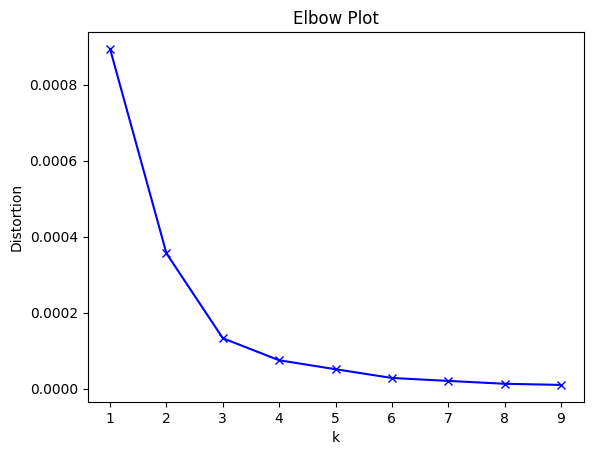

Silhouette Score: 0.6687469526281589
ARI: 0.2058677861371194

Cluster ID: 0
Purity Score: 44.44%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 9

Cluster ID: 1
Purity Score: 66.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 2
Purity Score: 90.91%
Dominant Topic: 14
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 60.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 33.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 12

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 33.33%
Dominant Topic: 11
Num

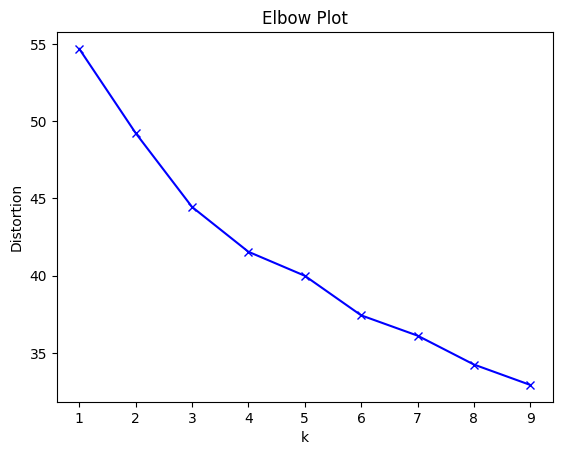

Silhouette Score: 0.19449994951297703
ARI: 0.4773759745502308

Cluster ID: 0
Purity Score: 33.33%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 3
Purity Score: 92.31%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 4
Purity Score: 33.33%
Dominant Topic: 3
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 5
Purity Score: 44.44%
Dominant Topic: 14
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 9

Cluster ID: 6
Purity Score: 60.0%
Dominant Topic: 1
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 7
Purity Score: 33.33%
Dominant Topic: 15
N

In [112]:
tokens_c_data_avg_purity = k_encode_purity(10, tokens_c_avg_tfidf_array, tokens_c_vector_avgs, c_data)
tokens_c_data_all_purity = k_encode_purity(10, tokens_c_tfidf_array, tokens_c_vectors, c_data)

### Tokens CDC_Data

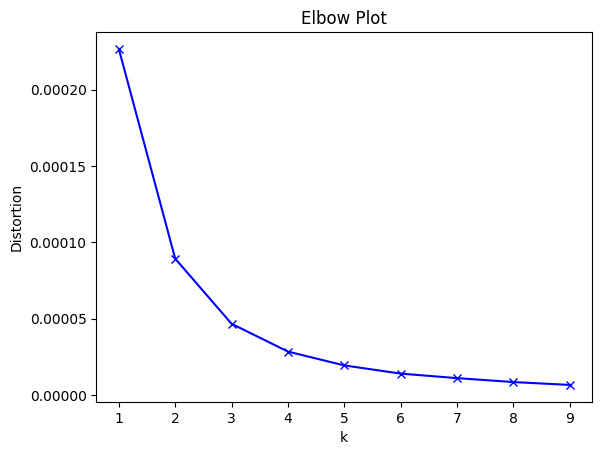

Silhouette Score: 0.5521772174321787
ARI: 0.007931879668891894

Cluster ID: 0
Purity Score: 6.11%
Dominant Topic: 63
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 311

Cluster ID: 1
Purity Score: 15.15%
Dominant Topic: 63
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 66

Cluster ID: 2
Purity Score: 17.12%
Dominant Topic: 42
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 111

Cluster ID: 3
Purity Score: 6.25%
Dominant Topic: 41
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 208

Cluster ID: 4
Purity Score: 8.41%
Dominant Topic: 42
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 214

Cluster ID: 5
Purity Score: 15.38%
Dominant Topic: 17
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 26

Cluster ID: 6
Purity Score: 10.69%
Dominant Topic: 63
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 131

Cluster ID: 7
Purity Score: 6.74%
Domin

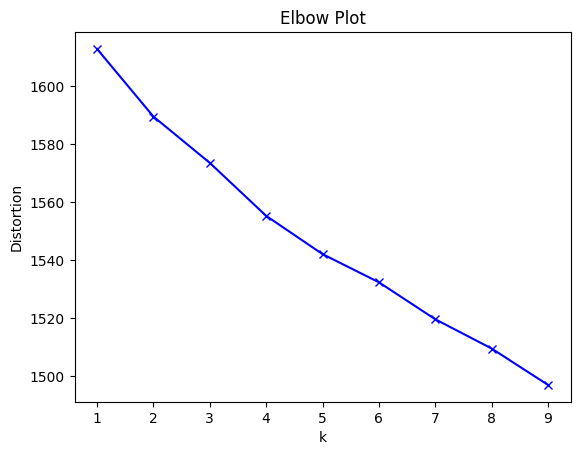

Silhouette Score: 0.027911925207007755
ARI: 0.04295764837881818

Cluster ID: 0
Purity Score: 23.21%
Dominant Topic: 78
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 56

Cluster ID: 1
Purity Score: 19.64%
Dominant Topic: 136
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 56

Cluster ID: 2
Purity Score: 11.16%
Dominant Topic: 37
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 233

Cluster ID: 3
Purity Score: 11.19%
Dominant Topic: 66
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 134

Cluster ID: 4
Purity Score: 12.99%
Dominant Topic: 63
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 154

Cluster ID: 5
Purity Score: 8.64%
Dominant Topic: 42
Number of Questions in Dominant Topic: 45
Topic Questions in Cluster: 521

Cluster ID: 6
Purity Score: 23.53%
Dominant Topic: 135
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 85

Cluster ID: 7
Purity Score: 15.14%

In [113]:
tokens_cdc_data_avg_purity = k_encode_purity(10, tokens_cdc_avg_tfidf_array, tokens_cdc_vector_avgs, cdc_data)
tokens_cdc_data_all_purity = k_encode_purity(10, tokens_cdc_tfidf_array, tokens_cdc_vectors, cdc_data)

### Tokens Class_Data

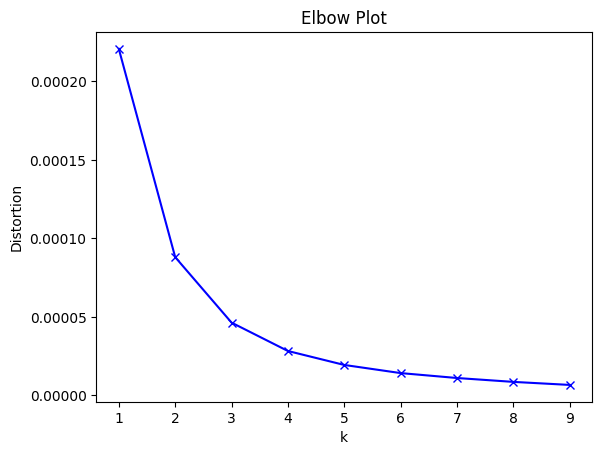

Silhouette Score: 0.5379930338236426
ARI: 0.00727234372702976

Cluster ID: 0
Purity Score: 6.6%
Dominant Topic: 147
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 318

Cluster ID: 1
Purity Score: 10.85%
Dominant Topic: 70
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 129

Cluster ID: 2
Purity Score: 7.09%
Dominant Topic: 147
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 254

Cluster ID: 3
Purity Score: 13.04%
Dominant Topic: 67
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 23

Cluster ID: 4
Purity Score: 5.73%
Dominant Topic: 73
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 227

Cluster ID: 5
Purity Score: 16.33%
Dominant Topic: 44
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 49

Cluster ID: 6
Purity Score: 5.31%
Dominant Topic: 73
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 207

Cluster ID: 7
Purity Score: 14.29%
Domina

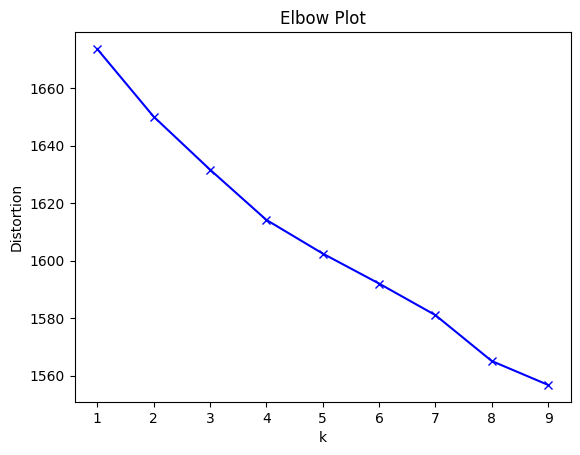

Silhouette Score: 0.027540455101091293
ARI: 0.04362407630664852

Cluster ID: 0
Purity Score: 10.0%
Dominant Topic: 127
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 150

Cluster ID: 1
Purity Score: 6.92%
Dominant Topic: 70
Number of Questions in Dominant Topic: 36
Topic Questions in Cluster: 520

Cluster ID: 2
Purity Score: 19.65%
Dominant Topic: 9
Number of Questions in Dominant Topic: 34
Topic Questions in Cluster: 173

Cluster ID: 3
Purity Score: 19.3%
Dominant Topic: 152
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 57

Cluster ID: 4
Purity Score: 16.67%
Dominant Topic: 0
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 108

Cluster ID: 5
Purity Score: 13.38%
Dominant Topic: 101
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 157

Cluster ID: 6
Purity Score: 23.08%
Dominant Topic: 70
Number of Questions in Dominant Topic: 39
Topic Questions in Cluster: 169

Cluster ID: 7
Purity Score: 15.56%


In [114]:
tokens_class_data_avg_purity = k_encode_purity(10, tokens_class_avg_tfidf_array, tokens_class_vector_avgs, class_data)
tokens_class_data_all_purity = k_encode_purity(10, tokens_class_tfidf_array, tokens_class_vectors, class_data)

## Lemma Purity Scores

### Lemma C_Data



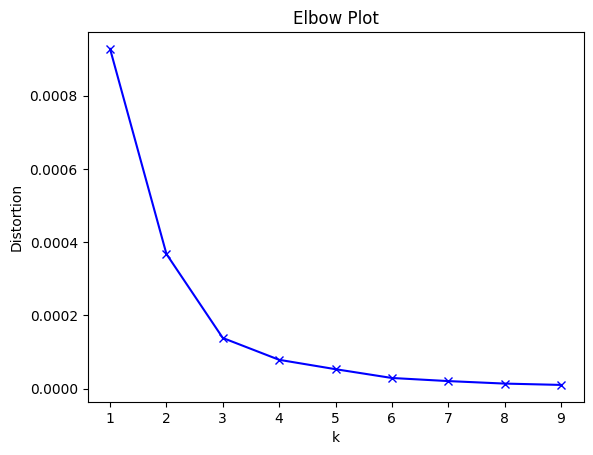

Silhouette Score: 0.6714403867179947
ARI: 0.20179161878854676

Cluster ID: 0
Purity Score: 40.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 10

Cluster ID: 1
Purity Score: 66.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 2
Purity Score: 90.91%
Dominant Topic: 14
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 60.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 4
Purity Score: 33.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 12

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 70.0%
Dominant Topic: 11
Num

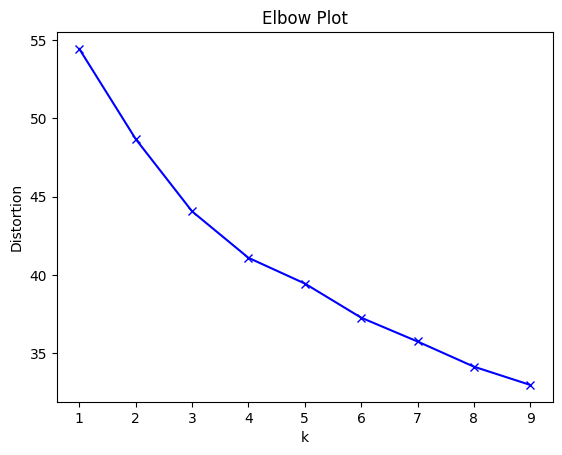

Silhouette Score: 0.19293054462391784
ARI: 0.43062651404691105

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 1
Purity Score: 92.31%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 4
Purity Score: 33.33%
Dominant Topic: 8
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 5
Purity Score: 30.77%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 13

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 2
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 7
Purity Score: 42.86%
Dominant Topic: 1

In [116]:
lemma_c_data_avg_purity = k_encode_purity(10, lemma_c_avg_tfidf_array, lemma_c_vector_avgs, c_data)
lemma_c_data_c_purity = k_encode_purity(10, lemma_c_tfidf_array, lemma_c_vectors, c_data)

### Lemma CDC_Data

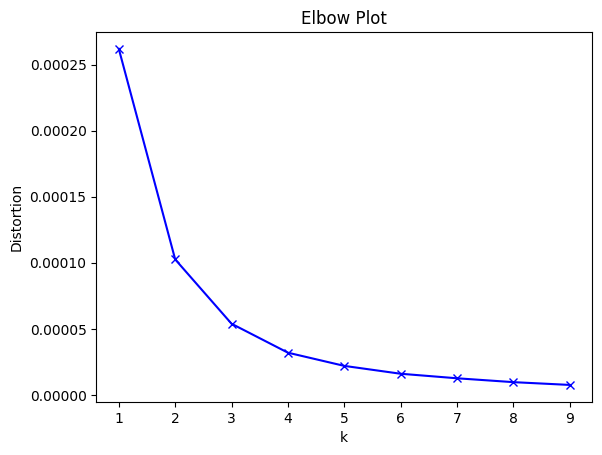

Silhouette Score: 0.5369159793034488
ARI: 0.007361146187853059

Cluster ID: 0
Purity Score: 5.63%
Dominant Topic: 66
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 231

Cluster ID: 1
Purity Score: 7.23%
Dominant Topic: 63
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 235

Cluster ID: 2
Purity Score: 9.59%
Dominant Topic: 63
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 73

Cluster ID: 3
Purity Score: 6.56%
Dominant Topic: 63
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 259

Cluster ID: 4
Purity Score: 13.68%
Dominant Topic: 63
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 117

Cluster ID: 5
Purity Score: 17.78%
Dominant Topic: 42
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 45

Cluster ID: 6
Purity Score: 5.41%
Dominant Topic: 66
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 185

Cluster ID: 7
Purity Score: 7.33%
Dominant

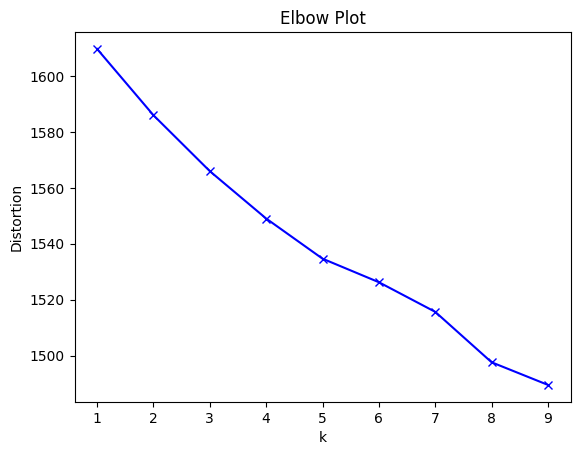

Silhouette Score: 0.026790273542273514
ARI: 0.02951159450694026

Cluster ID: 0
Purity Score: 48.72%
Dominant Topic: 63
Number of Questions in Dominant Topic: 38
Topic Questions in Cluster: 78

Cluster ID: 1
Purity Score: 25.86%
Dominant Topic: 42
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 58

Cluster ID: 2
Purity Score: 17.44%
Dominant Topic: 8
Number of Questions in Dominant Topic: 34
Topic Questions in Cluster: 195

Cluster ID: 3
Purity Score: 20.0%
Dominant Topic: 136
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 55

Cluster ID: 4
Purity Score: 8.38%
Dominant Topic: 112
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 167

Cluster ID: 5
Purity Score: 13.75%
Dominant Topic: 54
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 80

Cluster ID: 6
Purity Score: 17.48%
Dominant Topic: 136
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 103

Cluster ID: 7
Purity Score: 18.33%
D

In [117]:
lemma_cdc_data_avg_purity = k_encode_purity(10, lemma_cdc_avg_tfidf_array, lemma_cdc_vector_avgs, cdc_data)
lemma_cdc_data_cdc_purity = k_encode_purity(10, lemma_cdc_tfidf_array, lemma_cdc_vectors, cdc_data)

### Lemma Class_Data

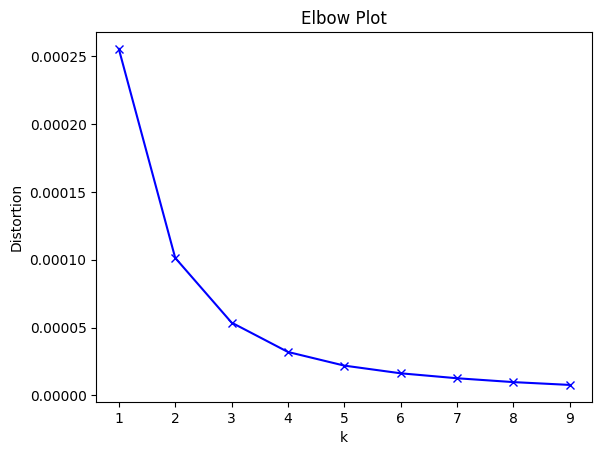

Silhouette Score: 0.5373410847819119
ARI: 0.007561790862357255

Cluster ID: 0
Purity Score: 9.59%
Dominant Topic: 70
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 73

Cluster ID: 1
Purity Score: 5.81%
Dominant Topic: 70
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 258

Cluster ID: 2
Purity Score: 12.57%
Dominant Topic: 44
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 191

Cluster ID: 3
Purity Score: 5.64%
Dominant Topic: 73
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 195

Cluster ID: 4
Purity Score: 6.83%
Dominant Topic: 70
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 249

Cluster ID: 5
Purity Score: 16.33%
Dominant Topic: 44
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 49

Cluster ID: 6
Purity Score: 13.01%
Dominant Topic: 70
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 123

Cluster ID: 7
Purity Score: 15.79%
Domina

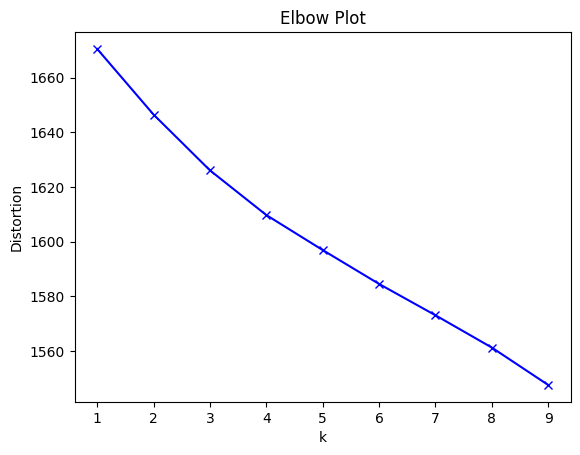

Silhouette Score: 0.02757053772790781
ARI: 0.03425924019211136

Cluster ID: 0
Purity Score: 11.46%
Dominant Topic: 39
Number of Questions in Dominant Topic: 22
Topic Questions in Cluster: 192

Cluster ID: 1
Purity Score: 20.63%
Dominant Topic: 85
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 63

Cluster ID: 2
Purity Score: 18.33%
Dominant Topic: 152
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 60

Cluster ID: 3
Purity Score: 16.82%
Dominant Topic: 0
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 107

Cluster ID: 4
Purity Score: 12.59%
Dominant Topic: 11
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 135

Cluster ID: 5
Purity Score: 26.56%
Dominant Topic: 70
Number of Questions in Dominant Topic: 51
Topic Questions in Cluster: 192

Cluster ID: 6
Purity Score: 9.2%
Dominant Topic: 73
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 163

Cluster ID: 7
Purity Score: 32.2%
Dom

In [118]:
lemma_class_data_avg_purity = k_encode_purity(10, lemma_class_avg_tfidf_array, lemma_class_vector_avgs, class_data)
lemma_class_data_class_purity = k_encode_purity(10, lemma_class_tfidf_array, lemma_class_vectors, class_data)

## Porter Purity Scores

### Porter C_Data

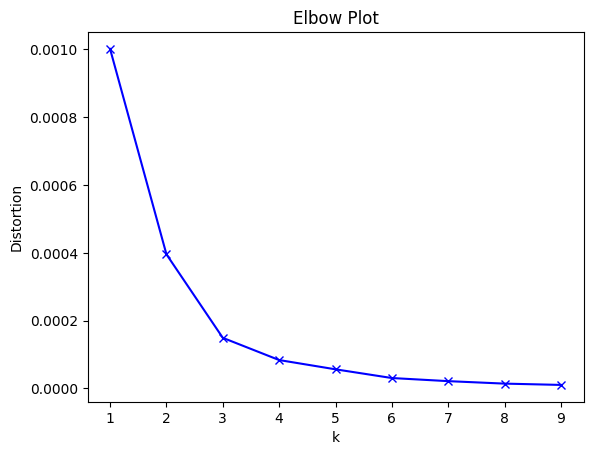

Silhouette Score: 0.6828361744974926
ARI: 0.20179161878854676

Cluster ID: 0
Purity Score: 40.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 10

Cluster ID: 1
Purity Score: 66.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 2
Purity Score: 90.91%
Dominant Topic: 14
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 60.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 33.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 12

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 70.0%
Dominant Topic: 11
Num

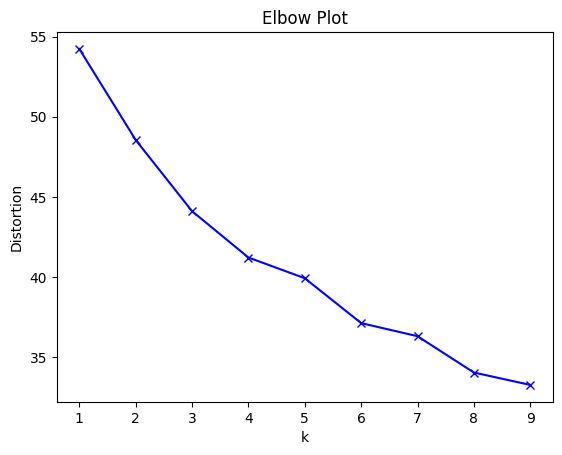

Silhouette Score: 0.18767332999302222
ARI: 0.5192588354796903

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 12

Cluster ID: 1
Purity Score: 92.86%
Dominant Topic: 11
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 14

Cluster ID: 2
Purity Score: 80.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 5

Cluster ID: 3
Purity Score: 33.33%
Dominant Topic: 3
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 6
Purity Score: 60.0%
Dominant Topic: 1
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 2
Numb

In [119]:
porter_c_data_avg_purity = k_encode_purity(10, porter_c_avg_tfidf_array, porter_c_vector_avgs, c_data)
porter_c_data_c_purity = k_encode_purity(10, porter_c_tfidf_array, porter_c_vectors, c_data)

### Porter CDC_Data

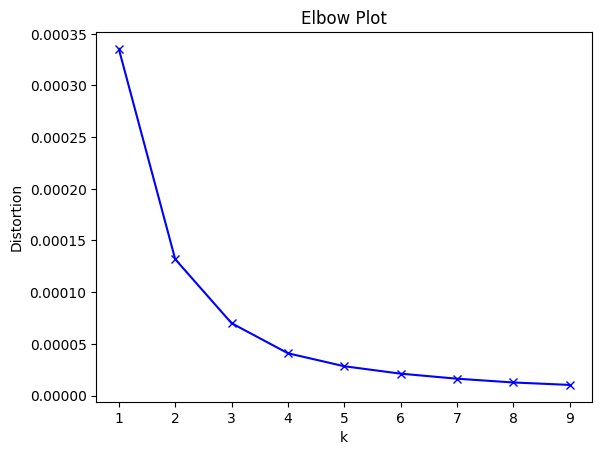

Silhouette Score: 0.5459889423265843
ARI: 0.007765169348632536

Cluster ID: 0
Purity Score: 5.0%
Dominant Topic: 63
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 300

Cluster ID: 1
Purity Score: 11.11%
Dominant Topic: 63
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 36

Cluster ID: 2
Purity Score: 16.96%
Dominant Topic: 42
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 112

Cluster ID: 3
Purity Score: 6.67%
Dominant Topic: 66
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 210

Cluster ID: 4
Purity Score: 8.93%
Dominant Topic: 42
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 224

Cluster ID: 5
Purity Score: 12.0%
Dominant Topic: 63
Number of Questions in Dominant Topic: 9
Topic Questions in Cluster: 75

Cluster ID: 6
Purity Score: 5.42%
Dominant Topic: 66
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 240

Cluster ID: 7
Purity Score: 11.38%
Dominant

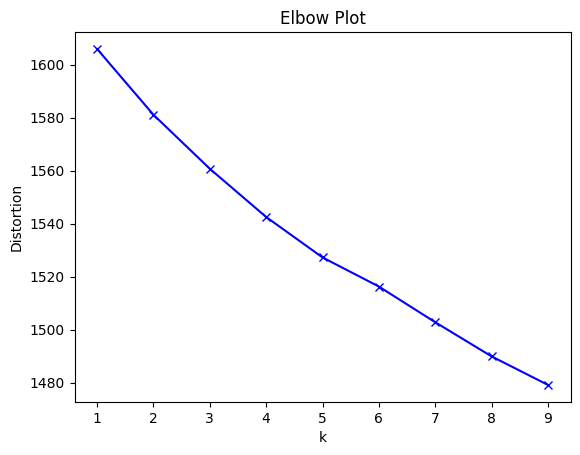

Silhouette Score: 0.030993468271984972
ARI: 0.050249115056209076

Cluster ID: 0
Purity Score: 50.0%
Dominant Topic: 63
Number of Questions in Dominant Topic: 41
Topic Questions in Cluster: 82

Cluster ID: 1
Purity Score: 9.38%
Dominant Topic: 112
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 160

Cluster ID: 2
Purity Score: 18.01%
Dominant Topic: 66
Number of Questions in Dominant Topic: 29
Topic Questions in Cluster: 161

Cluster ID: 3
Purity Score: 20.99%
Dominant Topic: 8
Number of Questions in Dominant Topic: 34
Topic Questions in Cluster: 162

Cluster ID: 4
Purity Score: 8.36%
Dominant Topic: 42
Number of Questions in Dominant Topic: 47
Topic Questions in Cluster: 562

Cluster ID: 5
Purity Score: 34.33%
Dominant Topic: 63
Number of Questions in Dominant Topic: 46
Topic Questions in Cluster: 134

Cluster ID: 6
Purity Score: 19.3%
Dominant Topic: 136
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 57

Cluster ID: 7
Purity Score: 19.12%
D

In [120]:
porter_cdc_data_avg_purity = k_encode_purity(10, porter_cdc_avg_tfidf_array, porter_cdc_vector_avgs, cdc_data)
porter_cdc_data_cdc_purity = k_encode_purity(10, porter_cdc_tfidf_array, porter_cdc_vectors, cdc_data)

### Porter Class_Data

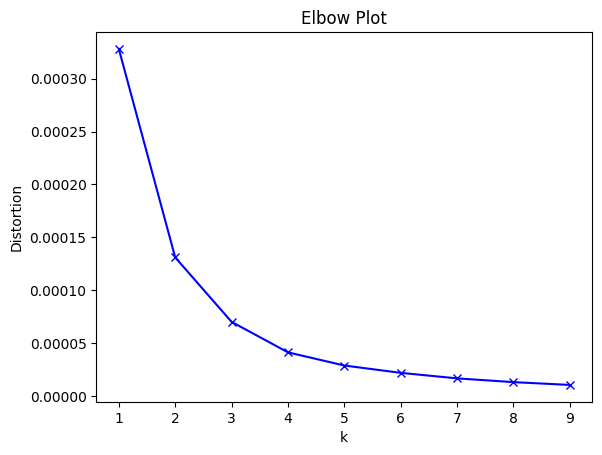

Silhouette Score: 0.5474079507583953
ARI: 0.006632185594857235

Cluster ID: 0
Purity Score: 7.87%
Dominant Topic: 70
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 254

Cluster ID: 1
Purity Score: 6.44%
Dominant Topic: 73
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 295

Cluster ID: 2
Purity Score: 10.94%
Dominant Topic: 70
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 64

Cluster ID: 3
Purity Score: 5.77%
Dominant Topic: 70
Number of Questions in Dominant Topic: 9
Topic Questions in Cluster: 156

Cluster ID: 4
Purity Score: 16.0%
Dominant Topic: 44
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 50

Cluster ID: 5
Purity Score: 5.9%
Dominant Topic: 147
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 356

Cluster ID: 6
Purity Score: 12.82%
Dominant Topic: 44
Number of Questions in Dominant Topic: 25
Topic Questions in Cluster: 195

Cluster ID: 7
Purity Score: 17.65%
Dominant

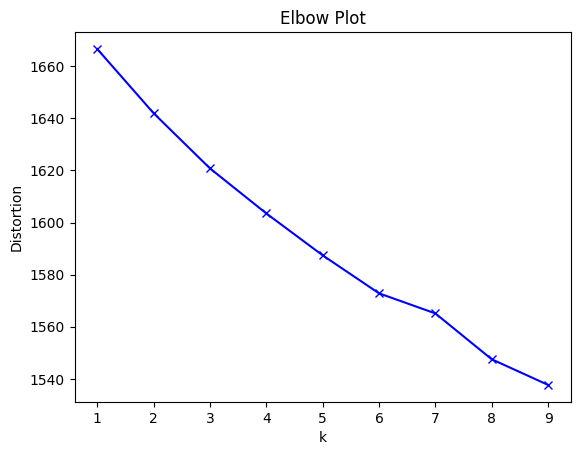

Silhouette Score: 0.028204326282321897
ARI: 0.03387358358178914

Cluster ID: 0
Purity Score: 15.79%
Dominant Topic: 101
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 152

Cluster ID: 1
Purity Score: 18.33%
Dominant Topic: 152
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 60

Cluster ID: 2
Purity Score: 10.79%
Dominant Topic: 73
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 139

Cluster ID: 3
Purity Score: 6.85%
Dominant Topic: 44
Number of Questions in Dominant Topic: 53
Topic Questions in Cluster: 774

Cluster ID: 4
Purity Score: 37.68%
Dominant Topic: 39
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 69

Cluster ID: 5
Purity Score: 19.44%
Dominant Topic: 86
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 72

Cluster ID: 6
Purity Score: 24.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 75

Cluster ID: 7
Purity Score: 11.19%
Do

In [121]:
porter_class_data_avg_purity = k_encode_purity(10, porter_class_avg_tfidf_array, porter_class_vector_avgs, class_data)
porter_class_data_class_purity = k_encode_purity(10, porter_class_tfidf_array, porter_class_vectors, class_data)

## Lancaster Purity Scores

### Lancaster C_Data

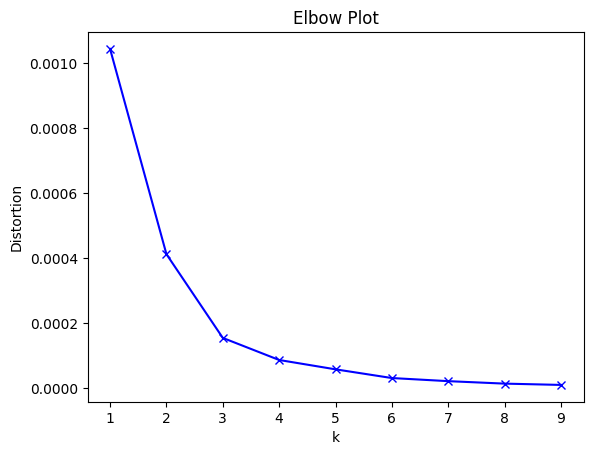

Silhouette Score: 0.6835270841656044
ARI: 0.20179161878854676

Cluster ID: 0
Purity Score: 40.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 10

Cluster ID: 1
Purity Score: 66.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 2
Purity Score: 90.91%
Dominant Topic: 14
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 60.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 33.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 12

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 70.0%
Dominant Topic: 11
Num

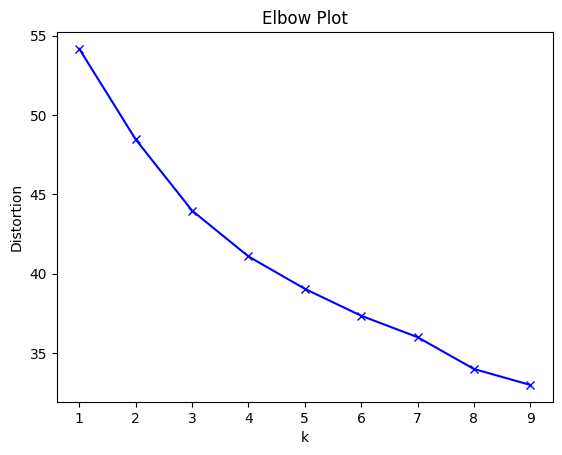

Silhouette Score: 0.16023262837880145
ARI: 0.5022469252601703

Cluster ID: 0
Purity Score: 40.0%
Dominant Topic: 12
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 5

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 12

Cluster ID: 2
Purity Score: 92.31%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 3
Purity Score: 66.67%
Dominant Topic: 15
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 4
Purity Score: 75.0%
Dominant Topic: 1
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 4

Cluster ID: 5
Purity Score: 50.0%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 4

Cluster ID: 6
Purity Score: 20.0%
Dominant Topic: 8
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 5

Cluster ID: 7
Purity Score: 100.0%
Dominant Topic: 11
Numb

In [122]:
lancaster_c_data_avg_purity = k_encode_purity(10, lancaster_c_avg_tfidf_array, lancaster_c_vector_avgs, c_data)
lancaster_c_data_c_purity = k_encode_purity(10, lancaster_c_tfidf_array, lancaster_c_vectors, c_data)

### Lancaster CDC_Data

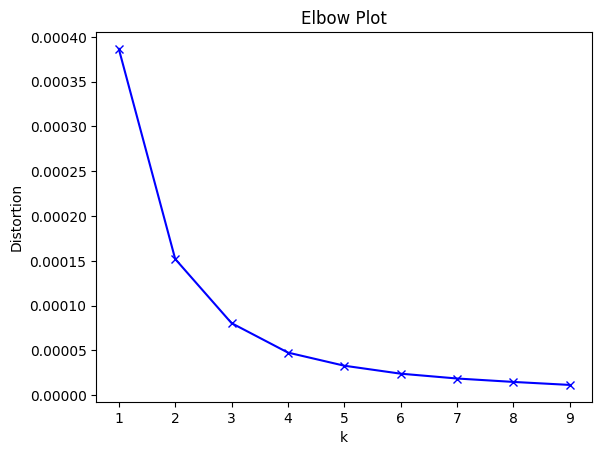

Silhouette Score: 0.544598328173259
ARI: 0.007536526300171758

Cluster ID: 0
Purity Score: 5.86%
Dominant Topic: 66
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 256

Cluster ID: 1
Purity Score: 16.96%
Dominant Topic: 42
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 112

Cluster ID: 2
Purity Score: 13.04%
Dominant Topic: 63
Number of Questions in Dominant Topic: 9
Topic Questions in Cluster: 69

Cluster ID: 3
Purity Score: 7.85%
Dominant Topic: 131
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 331

Cluster ID: 4
Purity Score: 11.5%
Dominant Topic: 63
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 113

Cluster ID: 5
Purity Score: 6.06%
Dominant Topic: 66
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 198

Cluster ID: 6
Purity Score: 11.43%
Dominant Topic: 63
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 35

Cluster ID: 7
Purity Score: 8.44%
Dominan

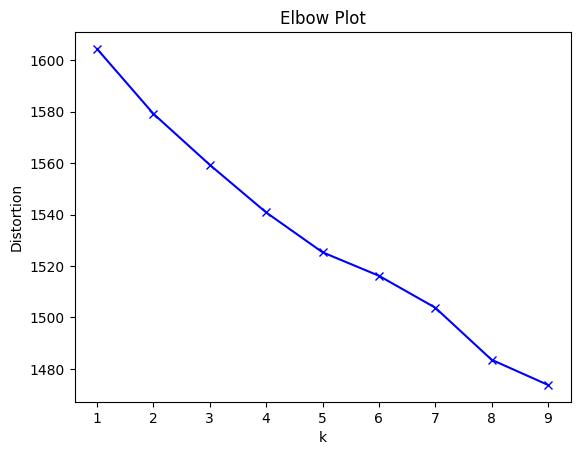

Silhouette Score: 0.029679919827028167
ARI: 0.04783833848026406

Cluster ID: 0
Purity Score: 14.94%
Dominant Topic: 37
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 174

Cluster ID: 1
Purity Score: 13.1%
Dominant Topic: 112
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 145

Cluster ID: 2
Purity Score: 31.25%
Dominant Topic: 0
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 64

Cluster ID: 3
Purity Score: 22.22%
Dominant Topic: 66
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 36

Cluster ID: 4
Purity Score: 42.7%
Dominant Topic: 63
Number of Questions in Dominant Topic: 38
Topic Questions in Cluster: 89

Cluster ID: 5
Purity Score: 20.8%
Dominant Topic: 66
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 125

Cluster ID: 6
Purity Score: 10.15%
Dominant Topic: 42
Number of Questions in Dominant Topic: 68
Topic Questions in Cluster: 670

Cluster ID: 7
Purity Score: 19.44%
Domi

In [123]:
lancaster_cdc_data_avg_purity = k_encode_purity(10, lancaster_cdc_avg_tfidf_array, lancaster_cdc_vector_avgs, cdc_data)
lancaster_cdc_data_cdc_purity = k_encode_purity(10, lancaster_cdc_tfidf_array, lancaster_cdc_vectors, cdc_data)

### Lancaster Class_Data

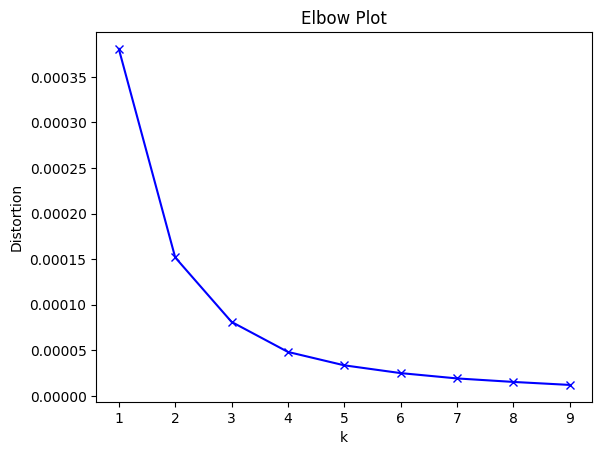

Silhouette Score: 0.5482781448064744
ARI: 0.006606092920450585

Cluster ID: 0
Purity Score: 11.67%
Dominant Topic: 70
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 60

Cluster ID: 1
Purity Score: 5.52%
Dominant Topic: 147
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 344

Cluster ID: 2
Purity Score: 7.6%
Dominant Topic: 70
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 263

Cluster ID: 3
Purity Score: 6.62%
Dominant Topic: 70
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 151

Cluster ID: 4
Purity Score: 6.0%
Dominant Topic: 73
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 300

Cluster ID: 5
Purity Score: 16.0%
Dominant Topic: 44
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 50

Cluster ID: 6
Purity Score: 10.75%
Dominant Topic: 116
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 93

Cluster ID: 7
Purity Score: 12.5%
Dominant 

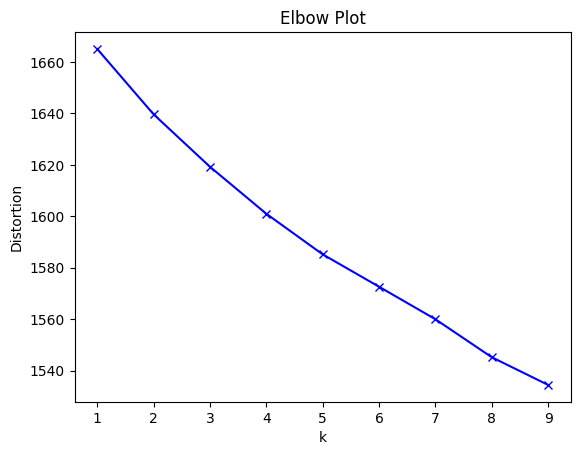

Silhouette Score: 0.03339893275821856
ARI: 0.05110452569766586

Cluster ID: 0
Purity Score: 13.33%
Dominant Topic: 39
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 180

Cluster ID: 1
Purity Score: 10.45%
Dominant Topic: 127
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 134

Cluster ID: 2
Purity Score: 18.64%
Dominant Topic: 152
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 59

Cluster ID: 3
Purity Score: 7.43%
Dominant Topic: 44
Number of Questions in Dominant Topic: 43
Topic Questions in Cluster: 579

Cluster ID: 4
Purity Score: 16.67%
Dominant Topic: 24
Number of Questions in Dominant Topic: 28
Topic Questions in Cluster: 168

Cluster ID: 5
Purity Score: 66.67%
Dominant Topic: 70
Number of Questions in Dominant Topic: 74
Topic Questions in Cluster: 111

Cluster ID: 6
Purity Score: 15.97%
Dominant Topic: 60
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 119

Cluster ID: 7
Purity Score: 19.12

In [124]:
lancaster_class_data_avg_purity = k_encode_purity(10, lancaster_class_avg_tfidf_array, lancaster_class_vector_avgs, class_data)
lancaster_class_data_class_purity = k_encode_purity(10, lancaster_class_tfidf_array, lancaster_class_vectors, class_data)

## Postag Purity Scores

### Postag C_Data

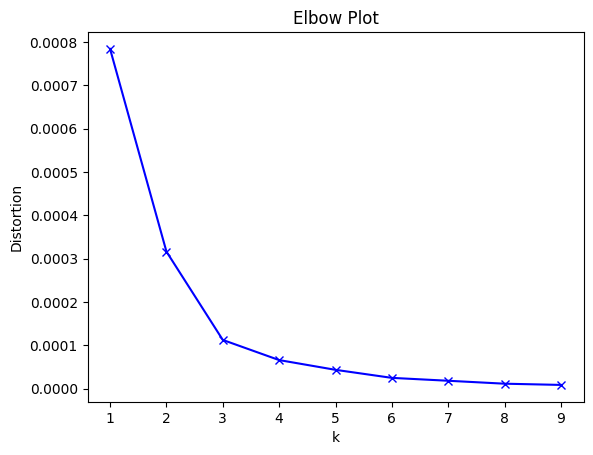

Silhouette Score: 0.6835453742140798
ARI: 0.2808677858903409

Cluster ID: 0
Purity Score: 40.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 5

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 8
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 2
Purity Score: 33.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 12

Cluster ID: 3
Purity Score: 66.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 3

Cluster ID: 4
Purity Score: 92.31%
Dominant Topic: 14
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 11
Numbe

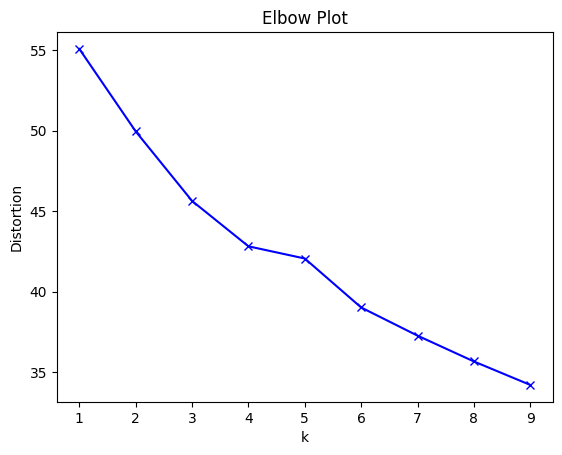

Silhouette Score: 0.18533678409679416
ARI: 0.4493308511011978

Cluster ID: 0
Purity Score: 33.33%
Dominant Topic: 8
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 1
Purity Score: 80.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 15

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 60.0%
Dominant Topic: 1
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 5

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 44.44%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 9

Cluster ID: 6
Purity Score: 25.0%
Dominant Topic: 0
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 4

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 3
Number

In [125]:
postag_c_data_avg_purity = k_encode_purity(10, postag_c_avg_tfidf_array, postag_c_vector_avgs, c_data)
postag_c_data_c_purity = k_encode_purity(10, postag_c_tfidf_array, postag_c_vectors, c_data)

### Postag CDC_Data

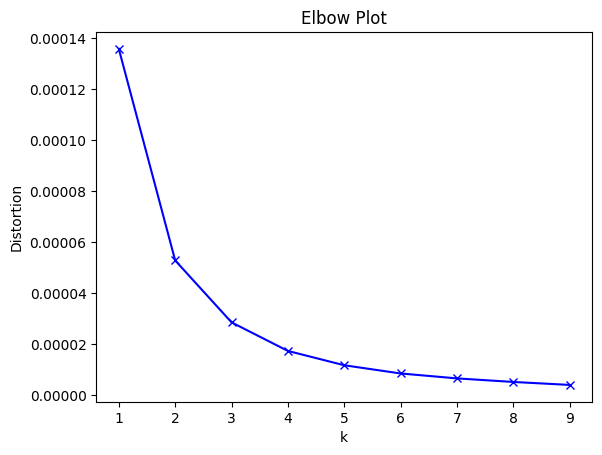

Silhouette Score: 0.548143628359884
ARI: 0.006806388773158919

Cluster ID: 0
Purity Score: 11.76%
Dominant Topic: 63
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 119

Cluster ID: 1
Purity Score: 7.41%
Dominant Topic: 131
Number of Questions in Dominant Topic: 22
Topic Questions in Cluster: 297

Cluster ID: 2
Purity Score: 5.42%
Dominant Topic: 136
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 277

Cluster ID: 3
Purity Score: 12.2%
Dominant Topic: 83
Number of Questions in Dominant Topic: 5
Topic Questions in Cluster: 41

Cluster ID: 4
Purity Score: 16.67%
Dominant Topic: 42
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 108

Cluster ID: 5
Purity Score: 5.18%
Dominant Topic: 63
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 309

Cluster ID: 6
Purity Score: 5.33%
Dominant Topic: 66
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 225

Cluster ID: 7
Purity Score: 11.59%
Domi

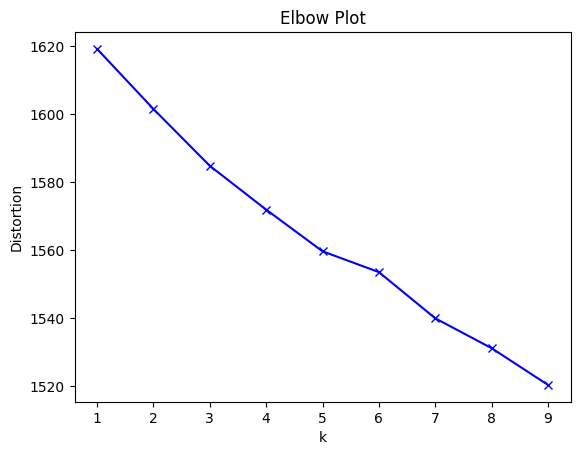

Silhouette Score: 0.02252397915105858
ARI: 0.03579704165711146

Cluster ID: 0
Purity Score: 36.25%
Dominant Topic: 23
Number of Questions in Dominant Topic: 29
Topic Questions in Cluster: 80

Cluster ID: 1
Purity Score: 21.26%
Dominant Topic: 63
Number of Questions in Dominant Topic: 27
Topic Questions in Cluster: 127

Cluster ID: 2
Purity Score: 19.48%
Dominant Topic: 63
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 77

Cluster ID: 3
Purity Score: 9.06%
Dominant Topic: 42
Number of Questions in Dominant Topic: 60
Topic Questions in Cluster: 662

Cluster ID: 4
Purity Score: 15.19%
Dominant Topic: 42
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 79

Cluster ID: 5
Purity Score: 9.93%
Dominant Topic: 112
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 141

Cluster ID: 6
Purity Score: 14.71%
Dominant Topic: 58
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 68

Cluster ID: 7
Purity Score: 24.1%
Domi

In [126]:
postag_cdc_data_avg_purity = k_encode_purity(10, postag_cdc_avg_tfidf_array, postag_cdc_vector_avgs, cdc_data)
postag_cdc_data_cdc_purity = k_encode_purity(10, postag_cdc_tfidf_array, postag_cdc_vectors, cdc_data)

### Postag Class_Data

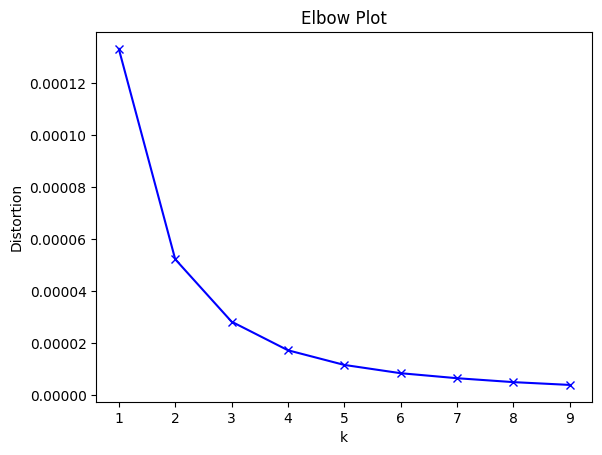

Silhouette Score: 0.5434941610325622
ARI: 0.006414840029422756

Cluster ID: 0
Purity Score: 6.0%
Dominant Topic: 73
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 300

Cluster ID: 1
Purity Score: 7.41%
Dominant Topic: 147
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 243

Cluster ID: 2
Purity Score: 10.34%
Dominant Topic: 91
Number of Questions in Dominant Topic: 6
Topic Questions in Cluster: 58

Cluster ID: 3
Purity Score: 4.79%
Dominant Topic: 9
Number of Questions in Dominant Topic: 9
Topic Questions in Cluster: 188

Cluster ID: 4
Purity Score: 12.28%
Dominant Topic: 44
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 171

Cluster ID: 5
Purity Score: 20.0%
Dominant Topic: 18
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 10

Cluster ID: 6
Purity Score: 6.49%
Dominant Topic: 147
Number of Questions in Dominant Topic: 22
Topic Questions in Cluster: 339

Cluster ID: 7
Purity Score: 13.39%
Dominant

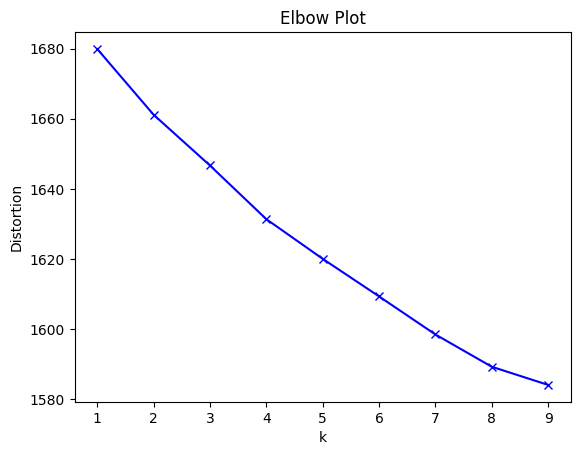

Silhouette Score: 0.020494778433633752
ARI: 0.032168764141634824

Cluster ID: 0
Purity Score: 55.43%
Dominant Topic: 70
Number of Questions in Dominant Topic: 51
Topic Questions in Cluster: 92

Cluster ID: 1
Purity Score: 6.56%
Dominant Topic: 44
Number of Questions in Dominant Topic: 47
Topic Questions in Cluster: 716

Cluster ID: 2
Purity Score: 24.1%
Dominant Topic: 0
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 83

Cluster ID: 3
Purity Score: 12.09%
Dominant Topic: 150
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 91

Cluster ID: 4
Purity Score: 9.21%
Dominant Topic: 127
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 152

Cluster ID: 5
Purity Score: 29.03%
Dominant Topic: 105
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 62

Cluster ID: 6
Purity Score: 21.15%
Dominant Topic: 152
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 52

Cluster ID: 7
Purity Score: 19.16%
D

In [127]:
postag_class_data_avg_purity = k_encode_purity(10, postag_class_avg_tfidf_array, postag_class_vectors, class_data)
postag_class_data_class_purity = k_encode_purity(10, postag_class_tfidf_array, postag_class_vector_avgs, class_data)

## Bigrams Purity Scores

In [129]:
# bigram_c_data_avg_purity = k_encode_purity(10, bigram_c_avg_tfidf_array, bigram_c_vectors, c_data)
# bigram_c_data_all_purity = k_encode_purity(10, bigram_c_tfidf_array, bigram_c_vector_avgs, c_data)

# bigram_cdc_data_avg_purity = k_encode_purity(10, bigram_cdc_avg_tfidf_array, bigram_cdc_vectors, cdc_data)
# bigram_cdc_data_all_purity = k_encode_purity(10, bigram_cdc_tfidf_array, bigram_cdc_vector_avgs, cdc_data)

# bigram_class_data_avg_purity = k_encode_purity(10, bigram_class_avg_tfidf_array, bigram_class_vectors, class_data)
# bigram_class_data_all_purity = k_encode_purity(10, bigram_class_tfidf_array, bigram_class_vector_avgs, class_data)